## SET FUNCITONS WD AND VARIABLES NEEDED

In [1]:
import os

os.chdir('/Users/alexascunceparis/Desktop/BSC/immuno_project/TCRranker')

from find_contact_map import *
from mapping import *
from select_nr_set import *
from extract_contacts import *

seq_dict=parse_general_file('./structures_annotation/general.txt')

# Chain dictionary
general_df=pd.read_csv('./structures_annotation/general.txt', sep='\t')
chain_dict = {}
for pdb_id, group in general_df.groupby('pdb.id'):
    chains = {
            'tcra_chain': None,
            'tcrb_chain': None,
            'peptide_chain': None,
            'mhc_chain': None
        }
        
    for _, row in group.iterrows():
        if row['chain.component'] == 'TCR' and row['chain.type'] == 'TRA':
            chains['tcra_chain'] = row['chain.id']
        elif row['chain.component'] == 'TCR' and row['chain.type'] == 'TRB':
            chains['tcrb_chain'] = row['chain.id']
        elif row['chain.component'] == 'PEPTIDE':
            chains['peptide_chain'] = row['chain.id']
        elif row['chain.component'] == 'MHC' and row['chain.supertype'] == 'MHCI' and row['chain.type'] == 'MHCa':
            chains['mhc_chain'] = row['chain.id']
        
    chain_dict[pdb_id] = chains

/opt/miniconda3/envs/anarci/lib/python3.12/site-packages/tcrdist/olga_load_model.py:3: SyntaxWarning: invalid escape sequence '\p'
  """Define classes for V(D)J generative models and genomic data.
/opt/miniconda3/envs/anarci/lib/python3.12/site-packages/olga/utils.py:493: SyntaxWarning: invalid escape sequence '\s'
  """Calculate the entropy of an insertion junction.
/opt/miniconda3/envs/anarci/lib/python3.12/site-packages/olga/generation_probability.py:523: SyntaxWarning: invalid escape sequence '\['
  bracket_ex = [x for x in re.findall('\[[' + aa_symbols + ']*?\]|\{\d+,{0,1}\d*\}', regex_seq)]
/opt/miniconda3/envs/anarci/lib/python3.12/site-packages/olga/generation_probability.py:523: SyntaxWarning: invalid escape sequence '\]'
  bracket_ex = [x for x in re.findall('\[[' + aa_symbols + ']*?\]|\{\d+,{0,1}\d*\}', regex_seq)]
/opt/miniconda3/envs/anarci/lib/python3.12/site-packages/olga/generation_probability.py:526: SyntaxWarning: invalid escape sequence '\['
  split_seq  = re.split('

## COGNATE TCR-RANK

In [130]:
import os
import pandas as pd

# Path to the folder where score files are located
scores_folder = './output/'
results=[]
# Read the files and store the scores
for file in os.listdir(scores_folder):
    if file.startswith('scores_random') and file.endswith('.csv'):
        tcr_id_reference = file.split('_')[2].split('.')[0] 
        # Read the CSV file
        scores = pd.read_csv(os.path.join(scores_folder, file))
        
        # Group by tcr_id and extract the unique score
        unique_scores = scores.groupby('tcr_id').agg({'score_tcr_p': 'first'}).reset_index()
        score_dict = dict(zip(unique_scores['tcr_id'], unique_scores['score_tcr_p']))

        # Get the reference score for the specified tcr_id
        score_reference = score_dict.get(tcr_id_reference)
        
        # Check if the reference score is found
        if score_reference is not None:
            # Count how many scores are lower than the reference score
            lower_count = sum(1 for score in score_dict.values() if score < score_reference)
    
            # Calculate the total number of TCR IDs
            total_tcr_ids = len(score_dict)
            print(total_tcr_ids)
            # Calculate the percentage of TCR IDs with a lower score
            percentage_lower = (lower_count / total_tcr_ids) * 100 if total_tcr_ids > 0 else 0
    
            # Print results
            print(f'There are {lower_count} TCR IDs with a score lower than {score_reference} for TCR ID {tcr_id_reference}.')
            print(f'Cognate TCR rank {percentage_lower:.2f}% of the total TCR IDs.')
            
            # Append the results to the list
            results.append({
                'tcr_id_reference': tcr_id_reference,
                'percentage_lower': percentage_lower
            })
        else:
            print(f'TCR ID {tcr_id_reference} was not found.')

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Write the results to a CSV file
output_csv_path = os.path.join(scores_folder, 'cognate_TCR_rank_ran.csv')
results_df.to_csv(output_csv_path, index=False)

print(f'Results have been saved to {output_csv_path}.')

TCR ID 1184 was not found.
TCR ID 31004 was not found.
TCR ID 32525 was not found.
TCR ID 20861 was not found.
TCR ID 21410 was not found.
TCR ID 30079 was not found.
TCR ID 32308 was not found.
TCR ID 32240 was not found.
TCR ID 32724 was not found.
TCR ID 32255 was not found.
TCR ID 31748 was not found.
TCR ID 31990 was not found.
TCR ID 31760 was not found.
TCR ID 31774 was not found.
TCR ID 183 was not found.
TCR ID 32686 was not found.
TCR ID 32862 was not found.
TCR ID 30081 was not found.
TCR ID 33013 was not found.
TCR ID 32090 was not found.
TCR ID 32907 was not found.
TCR ID 32091 was not found.
TCR ID 33158 was not found.
TCR ID 1037 was not found.
TCR ID 21367 was not found.
TCR ID 32680 was not found.
TCR ID 32977 was not found.
TCR ID 33472 was not found.
TCR ID 32036 was not found.
TCR ID 32584 was not found.
TCR ID 30556 was not found.
TCR ID 30998 was not found.
TCR ID 32182 was not found.
TCR ID 33049 was not found.
TCR ID 32357 was not found.
TCR ID 32785 was not fou

# Cognate TCR rank for sequences

In [158]:
import os
import pandas as pd

# Path to the folder where score files are located
scores_folder = './output/TCRranker2/groups/'
results=[]

# Read the files and store the scores
for file in os.listdir(scores_folder):
    if file.startswith('scores_') and file.endswith('.csv'):
        tcr_id_reference = int(file.split('_')[2].split('.')[0])
        # Read the CSV file
        scores = pd.read_csv(os.path.join(scores_folder, file))
        
        # Group by tcr_id and extract the unique score
        unique_scores = scores.groupby('tcr_id').agg({'score_tcr_p': 'first'}).reset_index()
        score_dict = dict(zip(unique_scores['tcr_id'], unique_scores['score_tcr_p']))

        # Get the reference score for the specified tcr_id
        score_reference = score_dict.get(tcr_id_reference)
        
        # Check if the reference score is found
        if score_reference is not None:
            # Count how many scores are lower than the reference score
            lower_count = sum(1 for score in score_dict.values() if score < score_reference)
    
            # Calculate the total number of TCR IDs
            total_tcr_ids = len(score_dict)
            print(total_tcr_ids)
            # Calculate the percentage of TCR IDs with a lower score
            percentage_lower = (lower_count / total_tcr_ids) * 100 if total_tcr_ids > 0 else 0
    
            # Print results
            print(f'There are {lower_count} TCR IDs with a score lower than {score_reference} for TCR ID {tcr_id_reference}.')
            print(f'Cognate TCR rank {percentage_lower:.2f}% of the total TCR IDs.')
            
            # Append the results to the list
            results.append({
                'tcr_id': tcr_id_reference,
                'percentage_lower': percentage_lower
            })
        else:
            print(f'TCR ID {tcr_id_reference} was not found.')

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Write the results to a CSV file
output_csv_path = os.path.join(scores_folder, 'cognate_TCR_rank.csv')
results_df.to_csv(output_csv_path, index=False)

print(f'Results have been saved to {output_csv_path}.')

699
There are 321 TCR IDs with a score lower than 1.225887145849799 for TCR ID 1190.
Cognate TCR rank 45.92% of the total TCR IDs.
699
There are 420 TCR IDs with a score lower than 1.2273346785745392 for TCR ID 1184.
Cognate TCR rank 60.09% of the total TCR IDs.
699
There are 64 TCR IDs with a score lower than -0.5780378981075996 for TCR ID 32486.
Cognate TCR rank 9.16% of the total TCR IDs.
699
There are 98 TCR IDs with a score lower than -0.2886349035662539 for TCR ID 31004.
Cognate TCR rank 14.02% of the total TCR IDs.
699
There are 603 TCR IDs with a score lower than 2.700838783626268 for TCR ID 33149.
Cognate TCR rank 86.27% of the total TCR IDs.
699
There are 404 TCR IDs with a score lower than 1.745219720257886 for TCR ID 32525.
Cognate TCR rank 57.80% of the total TCR IDs.
699
There are 18 TCR IDs with a score lower than -1.6727965081116936 for TCR ID 20861.
Cognate TCR rank 2.58% of the total TCR IDs.
699
There are 153 TCR IDs with a score lower than -0.1709077707839147 for TC

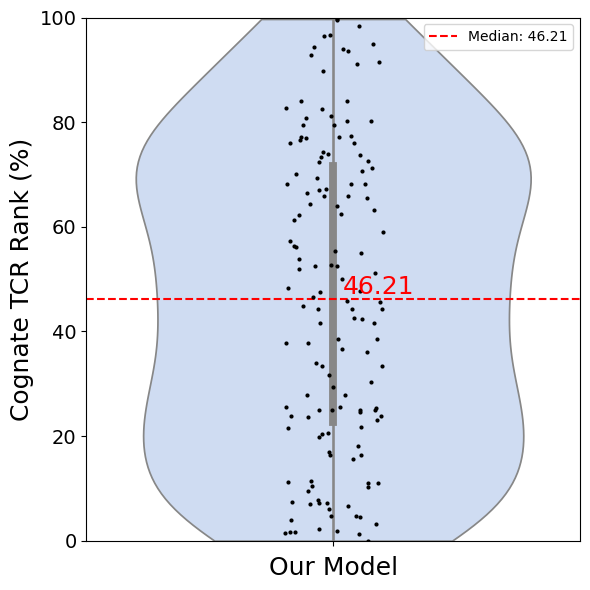

In [142]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data for test and training
df_test = pd.read_csv('./output/cognate_TCR_rank_gr.csv')

# Calculate the medians
median_test = df_test['percentage_lower'].median()

# Set up the figure and axes
fig, axes = plt.subplots(1, 1, figsize=(6, 6))  # Adjust size as needed

# Create the violin plot
sns.violinplot(data=df_test, y='percentage_lower', inner='box', color="#c9daf8ff", cut=0, ax=axes)
sns.stripplot(data=df_test, y='percentage_lower', color="black", size=3, jitter=True, ax=axes)

# Add a horizontal line for the median
axes.axhline(median_test, color='red', linestyle='--', label=f'Median: {median_test:.2f}')
axes.text(0.02, median_test + 1, f'{median_test:.2f}', color='red', ha='left', fontsize = 18)

# Set titles and labels
axes.set_xlabel("Our Model", fontsize =18)  # You may want to adjust the label if it's actually a y-axis label
axes.set_ylabel("Cognate TCR Rank (%)", fontsize = 18)
axes.tick_params(axis='y', labelsize=14)

# Configure the Y-axis limits
axes.set_ylim(0, 100)

# Adjust the layout
plt.tight_layout()
plt.legend()
plt.show()

## COGNATE MHCI RANK

#### Structures

In [61]:
import os
import pandas as pd

# Path to the folder where score files are located
scores_folder = './output/'

# Read the reference alleles from the CSV file
reference_alleles = pd.read_csv('./structures_annotation/mhc_alleles.csv')

# Initialize a list to store the results for saving to CSV
output_data = []

# Loop through each file in the scores folder
for file in os.listdir(scores_folder):
    if file.startswith('scores'):
        scores = pd.read_csv(os.path.join(scores_folder, file))
        
        # Extract the reference TCR ID from the filename
        reference_id = file.split('_')[1].split('.')[0]
        
        # Filter the scores DataFrame to include only the relevant TCR ID
        filtered_scores = scores[scores['tcr_id'] == reference_id]
        
        # Check if the filtered DataFrame is not empty
        if not filtered_scores.empty:
            # Create a dictionary for allele scores
            allele_score_dict = dict(zip(filtered_scores['mhc_allele'], filtered_scores['score_tcr_MHC']))
        else:
            print(f"No scores found for TCR ID {reference_id} in file {file}.")

        reference_row = reference_alleles[reference_alleles['pdb_id'] == reference_id]

        if not reference_row.empty:
            reference_allele = reference_row['mhci_allele'].values[0] + ":01:01" # Get the first matching mhc_allele
            print(reference_id, reference_allele)
        else:
            print(f"No matching reference allele found for reference ID {reference_id}.")
            reference_allele = None  # Ensure reference_allele is defined

        if reference_allele is not None:
            reference_score = allele_score_dict.get(reference_allele)
            print(reference_score)
            if reference_score is not None:
                # Count how many scores are lower than the reference score
                lower_count = sum(1 for score in allele_score_dict.values() if score < reference_score)

                # Calculate the total number of alleles
                total_alleles = len(allele_score_dict)

                # Calculate the percentage of alleles with a lower score
                percentage_lower = (lower_count / total_alleles) * 100 if total_alleles > 0 else 0

                # Print results
                print(f'There are {lower_count} alleles with a score lower than {reference_score} for allele {reference_allele}.')
                print(f'Percentage of alleles with lower scores: {percentage_lower:.2f}%')

                # Save the results in the output_data list
                output_data.append({'pdb_id': reference_id, 'percentage_lower': percentage_lower})
            else:
                print(f"No score found for reference allele {reference_allele}.")
        else:
            print("Reference allele is not defined. Cannot calculate lower scores.")
            output_data.append({'pdb_id': reference_id, 'percentage_lower': None})

# Convert the output data to a DataFrame
results_df = pd.DataFrame(output_data)

# Save the DataFrame to a CSV file
results_df.to_csv('./output/cognate_MHC_rank_testing.csv', index=False)
print("Results saved to './output/cognate_mhc_rank_testing.csv'.")

No scores found for TCR ID LOO in file scores_LOO_4mji.csv.
No matching reference allele found for reference ID LOO.
Reference allele is not defined. Cannot calculate lower scores.
No scores found for TCR ID LOO in file scores_LOO_5w1v.csv.
No matching reference allele found for reference ID LOO.
Reference allele is not defined. Cannot calculate lower scores.
No scores found for TCR ID LOO in file scores_LOO_7l1d.csv.
No matching reference allele found for reference ID LOO.
Reference allele is not defined. Cannot calculate lower scores.
No scores found for TCR ID LOO in file scores_LOO_2p5e.csv.
No matching reference allele found for reference ID LOO.
Reference allele is not defined. Cannot calculate lower scores.
No scores found for TCR ID LOO in file scores_LOO_7rtr.csv.
No matching reference allele found for reference ID LOO.
Reference allele is not defined. Cannot calculate lower scores.
No scores found for TCR ID LOO in file scores_LOO_7n1e.csv.
No matching reference allele found 

#### Sequences

In [113]:
import os
import pandas as pd

# Path to the folder where score files are located
scores_folder = './output/test_set'

# Read the reference alleles from the CSV file
reference_alleles = pd.read_csv('./structures_annotation/tcr_common_allinfo.csv')
reference_alleles['TCR_name'] = reference_alleles['TCR_name'].astype(str)

# Initialize a list to store the results for saving to CSV
output_data = []

# Loop through each file in the scores folder
for file in os.listdir(scores_folder):
    if file.startswith('retrained_paperall_'):
        scores = pd.read_csv(os.path.join(scores_folder, file))
        
        # Extract the reference TCR ID from the filename
        for id in scores['tcr_id'].unique()[1:]:
            reference_id = id
            print(reference_id)
            # Filter the scores DataFrame to include only the relevant TCR ID
            filtered_scores = scores[scores['tcr_id'] == reference_id]
        
            # Check if the filtered DataFrame is not empty
            if not filtered_scores.empty:
                # Create a dictionary for allele scores
                allele_score_dict = dict(zip(filtered_scores['mhc_allele'], filtered_scores['score_tcr_MHC']))
            else:
                print(f"No scores found for TCR ID {reference_id} in file {file}.")
            # Find the reference allele
            reference_row = reference_alleles[reference_alleles['TCR_name'] == reference_id]
            
            if not reference_row.empty:
                reference_allele = reference_row['MHC_allele'].values[0].replace("HLA-", "") + ":01:01"
                print(reference_allele)
            else:
                print(f"No matching reference allele found for reference ID {reference_id}.")
                reference_allele = None  # Ensure reference_allele is defined

            if reference_allele is not None:
                reference_score = allele_score_dict.get(reference_allele)
                print(reference_score)
                if reference_score is not None:
                    # Count how many scores are lower than the reference score
                    lower_count = sum(1 for score in allele_score_dict.values() if score < reference_score)

                    # Calculate the total number of alleles
                    total_alleles = len(allele_score_dict)
                    print(len(allele_score_dict))
                    # Calculate the percentage of alleles with a lower score
                    percentage_lower = (lower_count / total_alleles) * 100 if total_alleles > 0 else 0

                    # Save the results in the output_data list
                    output_data.append({'pdb_id': reference_id, 'percentage_lower': percentage_lower})
                else:
                    print(f"No score found for reference allele {reference_allele}.")
            else:
                print("Reference allele is not defined. Cannot calculate lower scores.")
            
# Convert the output data to a DataFrame
results_df = pd.DataFrame(output_data)

# Save the DataFrame to a CSV file
results_df.to_csv('./output/cognate_mhc_sequences_rank.csv', index=False)

print("Results saved to './output/cognate_mhc_sequences_rank.csv'.")

22560
A*03:01:01:01
-2.7045882512370207
30
33315
A*02:01:01:01
-1.0649110613426698
30
30403
B*44:02:01:01
3.5560840696548652
30
32798
A*01:01:01:01
-0.3975620829168459
30
32596
A*24:02:01:01
0.2206607726036845
30
31902
A*02:01:01:01
6.367567077885288
30
32385
A*02:01:01:01
4.190958188987148
30
31744
A*02:01:01:01
-1.5733687586136265
30
31901
A*02:01:01:01
1.4334623292118116
30
31741
A*02:01:01:01
5.005321518266501
30
31685
A*02:01:01:01
-3.2061993973013556
30
21392
A*02:01:01:01
-0.5810453982765701
30
32442
A*02:01:01:01
4.325145563352153
30
32732
A*02:01:01:01
-1.5672994298896794
30
33316
A*02:01:01:01
2.36380096849405
30
33317
A*02:01:01:01
-3.3586098264919184
30
32435
A*02:01:01:01
-1.836844730015845
30
31937
A*02:01:01:01
0.3909499140990849
30
32355
A*02:01:01:01
0.1676254339590976
30
31772
A*02:01:01:01
-1.8704283491750604
30
31881
A*02:01:01:01
-0.0868520427088891
30
30993
A*02:01:01:01
-1.576167859540302
30
32015
A*02:01:01:01
-2.2556117777173657
30
30112
A*02:01:01:01
-5.300123

# Add info with MHCs

In [159]:
import pandas as pd
import os
import numpy as np  # Import numpy for calculating median

# Directory containing the CSV files
directory = './output/TCRranker2/random/' 

# Read the reference alleles from the CSV file
reference_alleles = pd.read_csv('./structures_annotation/mhc_alleles_results.csv')

# Define hyperparameter values to test
hyperparameter_values = [0.0, 0.1, 0.2, 0.5, 0.6, 0.8, 1.0, 2]  

# Store results for each hyperparameter value
percentage_results = {hp: [] for hp in hyperparameter_values}

# Iterate over all CSV files in the specified directory
for filename in os.listdir(directory):
    if filename.endswith('.csv') and filename.startswith('scores_'):
        file_path = os.path.join(directory, filename)
        reference_id = filename.split('_')[2].split('.')[0]
        
        # Find the matching reference allele
        matching_rows = reference_alleles[reference_alleles['pdb_id'] == reference_id]
        if not matching_rows.empty:  # Check if the DataFrame is not empty
            reference_allele = matching_rows['mhci_allele'].values[0] + ":01:01"
            print("Reference Allele:", reference_allele)  # Print the reference allele
        else:
            print(f"No matching reference allele found for ID: {reference_id}")  # Log the issue
            continue  # Skip this file if no matching allele is found

        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)

        # Iterate over hyperparameter values
        result_dict = {}
        for hyperparameter in hyperparameter_values:
            # Iterate over the rows in the DataFrame and sum the scores
            for index, row in df.iterrows():
                tcr_id = row['tcr_id']
                mhc_allele = row['mhc_allele']
                total_score = row['score_tcr_p'] + hyperparameter * (row['score_tcr_MHC'])  # Hyperparameter
            
                # Add to the result dictionary
                if tcr_id not in result_dict:
                    result_dict[tcr_id] = {}
                    
                result_dict[tcr_id][mhc_allele] = total_score

            # Filter result_dict to only include alleles equal to the reference_allele
            filtered_result_dict = {
                tcr_id: {mhc_allele: score for mhc_allele, score in mhc_scores.items() if mhc_allele == reference_allele}
                for tcr_id, mhc_scores in result_dict.items()
                if any(mhc_allele == reference_allele for mhc_allele in mhc_scores)
            }

            # Extract the score for the reference_id
            reference_score = None
            if reference_id in filtered_result_dict:
                reference_score = next(iter(filtered_result_dict[reference_id].values()))
            
            # Calculate the percentage of scores less than the reference score
            if reference_score is not None:
                # Count how many scores are less than the reference score
                scores_less_than_reference = sum(
                    1 for tcr_id, scores in result_dict.items()
                    if tcr_id != reference_id and any(score < reference_score for score in scores.values())
                )
                
                # Total number of TCR IDs (excluding the reference ID)
                total_tcr_ids = len(result_dict) - 1  # Excluding the reference ID
                
                # Calculate the percentage and store it
                if total_tcr_ids > 0:  # To avoid division by zero
                    percentage = (scores_less_than_reference / total_tcr_ids) * 100
                    percentage_results[hyperparameter].append(percentage)
                    print(f"Percentage of scores less than the reference score for {reference_id} with hyperparameter {hyperparameter}: {percentage:.2f}%")
                else:
                    print(f"No TCR IDs to compare with for hyperparameter {hyperparameter}.")
            else:
                print(f"No score found for the reference allele: {reference_allele}.")

# Calculate the median percentage for each hyperparameter
median_results = {hp: np.median(pcts) for hp, pcts in percentage_results.items() if pcts}

# Find the hyperparameter with the lowest median percentage
lowest_median_hyperparameter = min(median_results, key=median_results.get)
lowest_median_percentage = median_results[lowest_median_hyperparameter]

# Print the results
print("\nFinal Summary of median percentages with different hyperparameter values:")
for hyperparameter, median_percentage in median_results.items():
    print(f"Hyperparameter: {hyperparameter}, Median Percentage: {median_percentage:.2f}%")

print(f"\nThe hyperparameter that gives the lowest median percentage is: {lowest_median_hyperparameter} with a median percentage of {lowest_median_percentage:.2f}%")

No matching reference allele found for ID: 10134
No matching reference allele found for ID: 30743
No matching reference allele found for ID: 16828
No matching reference allele found for ID: 2655
No matching reference allele found for ID: 9701
No matching reference allele found for ID: 15461
No matching reference allele found for ID: 22568
No matching reference allele found for ID: 13602
No matching reference allele found for ID: 16785
No matching reference allele found for ID: 15059
No matching reference allele found for ID: 9850
No matching reference allele found for ID: 15311
No matching reference allele found for ID: 19259
No matching reference allele found for ID: 7908
No matching reference allele found for ID: 33664
No matching reference allele found for ID: 15304
No matching reference allele found for ID: 13013
No matching reference allele found for ID: 1174
No matching reference allele found for ID: 31477
No matching reference allele found for ID: 20036
No matching reference all

ValueError: min() iterable argument is empty

In [43]:
import pandas as pd
import os
import numpy as np  # Import numpy for calculating median

# Directory containing the CSV files
directory = './output/test_set/Sequence information/mycode/mhcI (n=110)' 

# Read the reference alleles from the CSV file
reference_alleles = pd.read_csv('./structures_annotation/mhc_alleles_results.csv')

# Define hyperparameter values to test for both TCR-MHC and TCR-P scores
tcrp_values = [0, 0.1, 0.2, 0.5, 1.0]  # Values for the TCR-P score
mhc_values = [0, 0.1, 0.2, 0.5, 0.6, 0.8, 1.0, 2]  # Values for the TCR-MHC score

# Store results for each combination of hyperparameter values
percentage_results = {}

# Iterate over all CSV files in the specified directory
for filename in os.listdir(directory):
    if filename.endswith('.csv') and filename.startswith('scores_'):
        file_path = os.path.join(directory, filename)
        reference_id = filename.split('_')[2].split('.')[0]
        
        # Find the matching reference allele
        matching_rows = reference_alleles[reference_alleles['pdb_id'] == reference_id]
        if not matching_rows.empty:  # Check if the DataFrame is not empty
            reference_allele = matching_rows['mhci_allele'].values[0] + ":01:01"
            print("Reference Allele:", reference_allele)  # Print the reference allele
        else:
            print(f"No matching reference allele found for ID: {reference_id}")  # Log the issue
            continue  # Skip this file if no matching allele is found

        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)

        # Iterate over combinations of hyperparameter values (TCR-P and TCR-MHC)
        for tcrp_value in tcrp_values:
            for mhc_value in mhc_values:
                # Skip if both hyperparameters are zero
                if tcrp_value == 0 and mhc_value == 0:
                    print(f"Skipping combination of TCR-P {tcrp_value} and MHC {mhc_value} (both zero).")
                    continue

                result_dict = {}
                
                # Iterate over the rows in the DataFrame and sum the scores
                for index, row in df.iterrows():
                    tcr_id = row['tcr_id']
                    mhc_allele = row['mhc_allele']
                    total_score = (tcrp_value * row['score_tcr_p']) + (mhc_value * row['score_tcr_MHC'])  # Hyperparameter
                
                    # Add to the result dictionary
                    if tcr_id not in result_dict:
                        result_dict[tcr_id] = {}
                    
                    result_dict[tcr_id][mhc_allele] = total_score

                # Filter result_dict to only include alleles equal to the reference_allele
                filtered_result_dict = {
                    tcr_id: {mhc_allele: score for mhc_allele, score in mhc_scores.items() if mhc_allele == reference_allele}
                    for tcr_id, mhc_scores in result_dict.items()
                    if any(mhc_allele == reference_allele for mhc_allele in mhc_scores)
                }

                # Extract the score for the reference_id
                reference_score = None
                if reference_id in filtered_result_dict:
                    reference_score = next(iter(filtered_result_dict[reference_id].values()))
                
                # Calculate the percentage of scores less than the reference score
                if reference_score is not None:
                    # Count how many scores are less than the reference score
                    scores_less_than_reference = sum(
                        1 for tcr_id, scores in result_dict.items()
                        if tcr_id != reference_id and any(score < reference_score for score in scores.values())
                    )
                    
                    # Total number of TCR IDs (excluding the reference ID)
                    total_tcr_ids = len(result_dict) - 1  # Excluding the reference ID
                    
                    # Calculate the percentage and store it
                    if total_tcr_ids > 0:  # To avoid division by zero
                        percentage = (scores_less_than_reference / total_tcr_ids) * 100
                        if (tcrp_value, mhc_value) not in percentage_results:
                            percentage_results[(tcrp_value, mhc_value)] = []
                        percentage_results[(tcrp_value, mhc_value)].append(percentage)
                        print(f"Percentage of scores less than the reference score for {reference_id} with TCR-P {tcrp_value} and MHC {mhc_value}: {percentage:.2f}%")
                    else:
                        print(f"No TCR IDs to compare with for TCR-P {tcrp_value} and MHC {mhc_value}.")
                else:
                    print(f"No score found for the reference allele: {reference_allele}.")

# Calculate the median percentage for each combination of TCR-P and MHC hyperparameters
median_results = {comb: np.median(pcts) for comb, pcts in percentage_results.items() if pcts}

# Find the combination with the lowest median percentage
lowest_median_combination = min(median_results, key=median_results.get)
lowest_median_percentage = median_results[lowest_median_combination]

# Print the results
print("\nFinal Summary of median percentages with different hyperparameter combinations (TCR-P, MHC):")
for comb, median_percentage in median_results.items():
    print(f"TCR-P: {comb[0]}, MHC: {comb[1]}, Median Percentage: {median_percentage:.2f}%")

print(f"\nThe combination that gives the lowest median percentage is: TCR-P {lowest_median_combination[0]}, MHC {lowest_median_combination[1]} with a median percentage of {lowest_median_percentage:.2f}%")

Reference Allele: B*08:01:01:01
Skipping combination of TCR-P 0 and MHC 0 (both zero).
Percentage of scores less than the reference score for 3ffc with TCR-P 0 and MHC 0.1: 86.82%
Percentage of scores less than the reference score for 3ffc with TCR-P 0 and MHC 0.2: 86.82%
Percentage of scores less than the reference score for 3ffc with TCR-P 0 and MHC 0.5: 86.82%
Percentage of scores less than the reference score for 3ffc with TCR-P 0 and MHC 0.6: 86.82%
Percentage of scores less than the reference score for 3ffc with TCR-P 0 and MHC 0.8: 86.82%
Percentage of scores less than the reference score for 3ffc with TCR-P 0 and MHC 1.0: 86.82%
Percentage of scores less than the reference score for 3ffc with TCR-P 0 and MHC 2: 86.82%
Percentage of scores less than the reference score for 3ffc with TCR-P 0.1 and MHC 0: 25.36%
Percentage of scores less than the reference score for 3ffc with TCR-P 0.1 and MHC 0.1: 72.06%
Percentage of scores less than the reference score for 3ffc with TCR-P 0.1 a

In [51]:
import pandas as pd
import os
import numpy as np  # Import numpy for calculating median

# Directory containing the CSV files
directory = './output/training_set_similar/20<d<30 (n=130)' 

# Read the reference alleles from the CSV file
reference_alleles = pd.read_csv('./seqs_info/seqs_info.csv')

# Define hyperparameter values to test for TCR-P and MHC scores
tcrp_values = [0.0, 0.1, 0.2, 0.5, 1.0]  # Values for TCR-P score
mhc_values = [0.0, 0.1, 0.2, 0.5, 0.6, 0.8, 1.0, 2.0]  # Values for MHC score

# Store results for each combination of hyperparameter values
percentage_results = {}

# Iterate over all CSV files in the specified directory
for filename in os.listdir(directory):
    if filename.endswith('.csv') and filename.startswith('scores_seq'):
        file_path = os.path.join(directory, filename)
        reference_id = filename.split('_')[4].split('.')[0]
        
        # Find the matching reference allele
        matching_rows = reference_alleles[reference_alleles['TCR_name'] == int(reference_id)]
        if not matching_rows.empty:  # Check if the DataFrame is not empty
            reference_allele = matching_rows['MHC_allele'].values[0] + ":01:01"
            reference_allele = reference_allele.replace("HLA-", "")
            print(f"Reference Allele for {reference_id}", reference_allele)  # Print the reference allele
        else:
            print(f"No matching reference allele found for ID: {reference_id}")  # Log the issue
            continue  # Skip this file if no matching allele is found

        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)

        # Iterate over combinations of TCR-P and MHC hyperparameter values
        for tcrp_value in tcrp_values:
            for mhc_value in mhc_values:
                # Skip if both hyperparameters are zero
                if tcrp_value == 0 and mhc_value == 0:
                    print(f"Skipping combination of TCR-P {tcrp_value} and MHC {mhc_value} (both zero).")
                    continue
                
                result_dict = {}

                # Iterate over the rows in the DataFrame and sum the scores
                for index, row in df.iterrows():
                    tcr_id = row['tcr_id']
                    mhc_allele = row['mhc_allele']
                    total_score = (tcrp_value * row['score_tcr_p']) + (mhc_value * row['score_tcr_MHC'])  # Hyperparameters

                    # Add to the result dictionary
                    if tcr_id not in result_dict:
                        result_dict[tcr_id] = {}
                    
                    result_dict[tcr_id][mhc_allele] = total_score

                # Filter result_dict to only include alleles equal to the reference_allele
                filtered_result_dict = {
                    tcr_id: {mhc_allele: score for mhc_allele, score in mhc_scores.items() if mhc_allele == reference_allele}
                    for tcr_id, mhc_scores in result_dict.items()
                    if any(mhc_allele == reference_allele for mhc_allele in mhc_scores)
                }

                # Extract the score for the reference_id
                reference_score = None
                if int(reference_id) in filtered_result_dict:
                    reference_score = next(iter(filtered_result_dict[int(reference_id)].values()))
                
                # Calculate the percentage of scores less than the reference score
                if reference_score is not None:
                    # Count how many scores are less than the reference score
                    scores_less_than_reference = sum(
                        1 for tcr_id, scores in result_dict.items()
                        if tcr_id != int(reference_id) and any(score < reference_score for score in scores.values())
                    )
                    
                    # Total number of TCR IDs (excluding the reference ID)
                    total_tcr_ids = len(result_dict) - 1  # Excluding the reference ID
                    
                    # Calculate the percentage of scores less than the reference score
                    if reference_score is not None:
                        # Count how many scores are less than the reference score
                        scores_less_than_reference = sum(
                            1 for tcr_id, scores in result_dict.items()
                            if tcr_id != reference_id and any(score < reference_score for score in scores.values())
                        )
                        
                        # Total number of TCR IDs (excluding the reference ID)
                        total_tcr_ids = len(result_dict) - 1  # Excluding the reference ID
                        
                        # Calculate the percentage and store it
                        if total_tcr_ids > 0:  # To avoid division by zero
                            percentage = (scores_less_than_reference / total_tcr_ids) * 100
                            if (tcrp_value, mhc_value) not in percentage_results:
                                percentage_results[(tcrp_value, mhc_value)] = []
                            percentage_results[(tcrp_value, mhc_value)].append(percentage)
                            print(f"Percentage of scores less than the reference score for {reference_id} with TCR-P {tcrp_value} and MHC {mhc_value}: {percentage:.2f}%")
                        else:
                            print(f"No TCR IDs to compare with for TCR-P {tcrp_value} and MHC {mhc_value}.")
                    else:
                        print(f"No score found for the reference allele: {reference_allele}.")

# Calculate the median percentage for each combination of TCR-P and MHC hyperparameters
median_results = {comb: np.median(pcts) for comb, pcts in percentage_results.items() if pcts}

# Find the combination with the lowest median percentage
lowest_median_combination = min(median_results, key=median_results.get)
lowest_median_percentage = median_results[lowest_median_combination]

# Print the results
print("\nFinal Summary of median percentages with different hyperparameter combinations (TCR-P, MHC):")
for comb, median_percentage in median_results.items():
    print(f"TCR-P: {comb[0]}, MHC: {comb[1]}, Median Percentage: {median_percentage:.2f}%")

print(f"\nThe combination that gives the lowest median percentage is: TCR-P {lowest_median_combination[0]}, MHC {lowest_median_combination[1]} with a median percentage of {lowest_median_percentage:.2f}%")

Reference Allele for 10310 A*03:01:01:01
Skipping combination of TCR-P 0.0 and MHC 0.0 (both zero).
Percentage of scores less than the reference score for 10310 with TCR-P 0.0 and MHC 0.1: 18.62%
Percentage of scores less than the reference score for 10310 with TCR-P 0.0 and MHC 0.2: 18.62%
Percentage of scores less than the reference score for 10310 with TCR-P 0.0 and MHC 0.5: 18.62%
Percentage of scores less than the reference score for 10310 with TCR-P 0.0 and MHC 0.6: 18.62%
Percentage of scores less than the reference score for 10310 with TCR-P 0.0 and MHC 0.8: 18.62%
Percentage of scores less than the reference score for 10310 with TCR-P 0.0 and MHC 1.0: 18.62%
Percentage of scores less than the reference score for 10310 with TCR-P 0.0 and MHC 2.0: 18.62%
Percentage of scores less than the reference score for 10310 with TCR-P 0.1 and MHC 0.0: 24.79%
Percentage of scores less than the reference score for 10310 with TCR-P 0.1 and MHC 0.1: 12.32%
Percentage of scores less than the r

In [95]:
import pandas as pd
import os
import numpy as np  # Import numpy for calculating median

# Directory containing the CSV files
directory = './output/test_set/Sequence information/mycode/mhcI (n=110)' 

# Read the reference alleles from the CSV file
reference_alleles = pd.read_csv('./structures_annotation/mhc_alleles_results.csv')

# Define the hyperparameter value to test (fixed at 0.2)
hyperparameter_value = 0.5  

# Store results for this specific hyperparameter value
percentage_results = []

# Iterate over all CSV files in the specified directory
for filename in os.listdir(directory):
    if filename.endswith('.csv') and filename.startswith('scores_'):
        file_path = os.path.join(directory, filename)
        reference_id = filename.split('_')[2].split('.')[0]
        
        # Find the matching reference allele
        matching_rows = reference_alleles[reference_alleles['pdb_id'] == reference_id]
        if not matching_rows.empty:  # Check if the DataFrame is not empty
            reference_allele = matching_rows['mhci_allele'].values[0] + ":01:01"
            print("Reference Allele:", reference_allele)  # Print the reference allele
        else:
            print(f"No matching reference allele found for ID: {reference_id}")  # Log the issue
            continue  # Skip this file if no matching allele is found

        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)

        # Initialize a dictionary to store scores
        result_dict = {}
        
        # Calculate scores with the fixed hyperparameter
        for index, row in df.iterrows():
            tcr_id = row['tcr_id']
            mhc_allele = row['mhc_allele']
            total_score = row['score_tcr_p'] + hyperparameter_value * (row['score_tcr_MHC'])  # Hyperparameter
            
            # Add to the result dictionary
            if tcr_id not in result_dict:
                result_dict[tcr_id] = {}
                
            result_dict[tcr_id][mhc_allele] = total_score

        # Filter result_dict to only include alleles equal to the reference_allele
        filtered_result_dict = {
            tcr_id: {mhc_allele: score for mhc_allele, score in mhc_scores.items() if mhc_allele == reference_allele}
            for tcr_id, mhc_scores in result_dict.items()
            if any(mhc_allele == reference_allele for mhc_allele in mhc_scores)
        }

        # Extract the score for the reference_id
        reference_score = None
        if reference_id in filtered_result_dict:
            reference_score = next(iter(filtered_result_dict[reference_id].values()))
        
        # Calculate the percentage of scores less than the reference score
        if reference_score is not None:
            # Count how many scores are less than the reference score
            scores_less_than_reference = sum(
                1 for tcr_id, scores in result_dict.items()
                if tcr_id != reference_id and any(score < reference_score for score in scores.values())
            )
            
            # Total number of TCR IDs (excluding the reference ID)
            total_tcr_ids = len(result_dict) - 1  # Excluding the reference ID
            
            # Calculate the percentage and store it
            if total_tcr_ids > 0:  # To avoid division by zero
                percentage = (scores_less_than_reference / total_tcr_ids) * 100
                percentage_results.append({'reference_id': reference_id, 'percentage': percentage})
                print(f"Percentage of scores less than the reference score for {reference_id} with hyperparameter {hyperparameter_value}: {percentage:.2f}%")
            else:
                print(f"No TCR IDs to compare with for hyperparameter {hyperparameter_value}.")
        else:
            print(f"No score found for the reference allele: {reference_allele}.")

# Create a DataFrame from the percentage results
percentage_results_df = pd.DataFrame(percentage_results)

# Save the percentage results to a CSV file
percentage_results_df.to_csv('cognate_tcr_rank_mhc.csv', index=False)

print("The file 'cognate_tcr_rank_mhc.csv' has been generated with the calculated percentages.")

Reference Allele: B*08:01:01:01
Percentage of scores less than the reference score for 3ffc with hyperparameter 0.5: 55.87%
Reference Allele: A*02:01:01:01
Percentage of scores less than the reference score for 5isz with hyperparameter 0.5: 23.21%
Reference Allele: B*08:01:01:01
Percentage of scores less than the reference score for 4qrp with hyperparameter 0.5: 0.29%
Reference Allele: C*06:02:01:01
Percentage of scores less than the reference score for 8shi with hyperparameter 0.5: 10.60%
Reference Allele: B*35:01:01:01
Percentage of scores less than the reference score for 4qrr with hyperparameter 0.5: 65.76%
Reference Allele: B*57:01:01:01
Percentage of scores less than the reference score for 8f5a with hyperparameter 0.5: 37.11%
Reference Allele: A*02:01:01:01
Percentage of scores less than the reference score for 8dnt with hyperparameter 0.5: 4.73%
Reference Allele: B*08:01:01:01
Percentage of scores less than the reference score for 1mi5 with hyperparameter 0.5: 5.16%
Reference A

### ADD info for seqs

In [168]:
import pandas as pd
import os
import numpy as np  # Import numpy for calculating median

# Directory containing the CSV files
directory = './output/TCRranker/random' 

# Read the reference alleles from the CSV file
reference_alleles = pd.read_csv('./seqs_info/seqs_info.csv')

# Define hyperparameter values to test
hyperparameter_values = [0,0.2, 0.5]  

# Store results for each hyperparameter value
percentage_results = {hp: [] for hp in hyperparameter_values}

# Iterate over all CSV files in the specified directory
for filename in os.listdir(directory):
    if filename.endswith('.csv') and filename.startswith('scores_'):
        file_path = os.path.join(directory, filename)
        reference_id = int(filename.split('_')[2].split('.')[0])
        
        # Find the matching reference allele
        matching_rows = reference_alleles[reference_alleles['TCR_name'] == reference_id]
        if not matching_rows.empty:  # Check if the DataFrame is not empty
            reference_allele = matching_rows['MHC_allele'].values[0] + ":01:01"
            reference_allele = reference_allele.replace("HLA-", "")
            print("Reference Allele:", reference_allele)  # Print the reference allele
        else:
            print(f"No matching reference allele found for ID: {reference_id}")  # Log the issue
            continue  # Skip this file if no matching allele is found

        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)

        # Iterate over hyperparameter values
        result_dict = {}
        for hyperparameter in hyperparameter_values:
            # Iterate over the rows in the DataFrame and sum the scores
            for index, row in df.iterrows():
                tcr_id = row['tcr_id']
                mhc_allele = row['mhc_allele']
                total_score = row['score_tcr_p'] + hyperparameter * (row['score_tcr_MHC'])  # Hyperparameter
            
                # Add to the result dictionary
                if tcr_id not in result_dict:
                    result_dict[tcr_id] = {}
                    
                result_dict[tcr_id][mhc_allele] = total_score

            # Filter result_dict to only include alleles equal to the reference_allele
            filtered_result_dict = {
                tcr_id: {mhc_allele: score for mhc_allele, score in mhc_scores.items() if mhc_allele == reference_allele}
                for tcr_id, mhc_scores in result_dict.items()
                if any(mhc_allele == reference_allele for mhc_allele in mhc_scores)
            }

            # Extract the score for the reference_id
            reference_score = None
            if reference_id in filtered_result_dict:
                reference_score = next(iter(filtered_result_dict[reference_id].values()))
            
            # Calculate the percentage of scores less than the reference score
            if reference_score is not None:
                # Count how many scores are less than the reference score
                scores_less_than_reference = sum(
                    1 for tcr_id, scores in result_dict.items()
                    if tcr_id != reference_id and any(score < reference_score for score in scores.values())
                )
                
                # Total number of TCR IDs (excluding the reference ID)
                total_tcr_ids = len(result_dict) - 1  # Excluding the reference ID
                
                # Calculate the percentage and store it
                if total_tcr_ids > 0:  # To avoid division by zero
                    percentage = (scores_less_than_reference / total_tcr_ids) * 100
                    percentage_results[hyperparameter].append(percentage)
                    print(f"Percentage of scores less than the reference score for {reference_id} with hyperparameter {hyperparameter}: {percentage:.2f}%")
                else:
                    print(f"No TCR IDs to compare with for hyperparameter {hyperparameter}.")
            else:
                print(f"No score found for the reference allele: {reference_allele}.")

# Calculate the median percentage for each hyperparameter
median_results = {hp: np.median(pcts) for hp, pcts in percentage_results.items() if pcts}

# Find the hyperparameter with the lowest median percentage
lowest_median_hyperparameter = min(median_results, key=median_results.get)
lowest_median_percentage = median_results[lowest_median_hyperparameter]

# Print the results
print("\nFinal Summary of median percentages with different hyperparameter values:")
for hyperparameter, median_percentage in median_results.items():
    print(f"Hyperparameter: {hyperparameter}, Median Percentage: {median_percentage:.2f}%")

print(f"\nThe hyperparameter that gives the lowest median percentage is: {lowest_median_hyperparameter} with a median percentage of {lowest_median_percentage:.2f}%")

Reference Allele: A*24:02:01:01
Percentage of scores less than the reference score for 32592 with hyperparameter 0: 8.02%
Percentage of scores less than the reference score for 32592 with hyperparameter 0.2: 4.87%
Percentage of scores less than the reference score for 32592 with hyperparameter 0.5: 4.58%
Reference Allele: B*08:01:01:01
Percentage of scores less than the reference score for 1037 with hyperparameter 0: 66.48%
Percentage of scores less than the reference score for 1037 with hyperparameter 0.2: 60.46%
Percentage of scores less than the reference score for 1037 with hyperparameter 0.5: 55.44%
Reference Allele: A*02:01:01:01
Percentage of scores less than the reference score for 32182 with hyperparameter 0: 97.28%
Percentage of scores less than the reference score for 32182 with hyperparameter 0.2: 98.42%
Percentage of scores less than the reference score for 32182 with hyperparameter 0.5: 98.71%
Reference Allele: A*02:01:01:01
Percentage of scores less than the reference sc

In [170]:
import pandas as pd
import os
import numpy as np  # Import numpy for calculating median

# Directory containing the CSV files
directory = './output/TCRranker/groups' 

# Read the reference alleles from the CSV file
reference_alleles = pd.read_csv('./seqs_info/seqs_info.csv')

# Define hyperparameter values to test
hyperparameter_values = [0, 0.2, 0.5]  

# Store results for each hyperparameter value
percentage_results = {hp: [] for hp in hyperparameter_values}
percentage_results_with_ids = {hp: [] for hp in [0.2, 0.5]}  # Specifically for storing results for hyperparameters 0.2 and 0.5

# Iterate over all CSV files in the specified directory
for filename in os.listdir(directory):
    if filename.endswith('.csv') and filename.startswith('scores_'):
        file_path = os.path.join(directory, filename)
        reference_id = int(filename.split('_')[2].split('.')[0])
        
        # Find the matching reference allele
        matching_rows = reference_alleles[reference_alleles['TCR_name'] == reference_id]
        if not matching_rows.empty:  # Check if the DataFrame is not empty
            reference_allele = matching_rows['MHC_allele'].values[0] + ":01:01"
            reference_allele = reference_allele.replace("HLA-", "")
        else:
            print(f"No matching reference allele found for ID: {reference_id}")
            continue  # Skip this file if no matching allele is found

        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)

        # Iterate over hyperparameter values
        result_dict = {}
        for hyperparameter in hyperparameter_values:
            # Iterate over the rows in the DataFrame and sum the scores
            for index, row in df.iterrows():
                tcr_id = row['tcr_id']
                mhc_allele = row['mhc_allele']
                total_score = row['score_tcr_p'] + hyperparameter * (row['score_tcr_MHC'])
            
                # Add to the result dictionary
                if tcr_id not in result_dict:
                    result_dict[tcr_id] = {}
                    
                result_dict[tcr_id][mhc_allele] = total_score

            # Filter result_dict to only include alleles equal to the reference_allele
            filtered_result_dict = {
                tcr_id: {mhc_allele: score for mhc_allele, score in mhc_scores.items() if mhc_allele == reference_allele}
                for tcr_id, mhc_scores in result_dict.items()
                if any(mhc_allele == reference_allele for mhc_allele in mhc_scores)
            }

            # Extract the score for the reference_id
            reference_score = None
            if reference_id in filtered_result_dict:
                reference_score = next(iter(filtered_result_dict[reference_id].values()))
            
            # Calculate the percentage of scores less than the reference score
            if reference_score is not None:
                scores_less_than_reference = sum(
                    1 for tcr_id, scores in result_dict.items()
                    if tcr_id != reference_id and any(score < reference_score for score in scores.values())
                )
                
                total_tcr_ids = len(result_dict) - 1  # Excluding the reference ID
                
                if total_tcr_ids > 0:  # To avoid division by zero
                    percentage = (scores_less_than_reference / total_tcr_ids) * 100
                    percentage_results[hyperparameter].append(percentage)

                    # Store results with tcr_id if the hyperparameter is 0.2 or 0.5
                    if hyperparameter in [0.2, 0.5]:
                        percentage_results_with_ids[hyperparameter].append({'tcr_id': reference_id, 'percentage': percentage})

# Calculate the median percentage for each hyperparameter
median_results = {hp: np.median(pcts) for hp, pcts in percentage_results.items() if pcts}

# Find the hyperparameter with the lowest median percentage
lowest_median_hyperparameter = min(median_results, key=median_results.get)
lowest_median_percentage = median_results[lowest_median_hyperparameter]

# Save results for hyperparameter 0.2 and 0.5 into CSV files
for hp in [0.2, 0.5]:
    hp_df = pd.DataFrame(percentage_results_with_ids[hp])
    hp_df.to_csv(f'./output/TCRranker/groups/{hp}_percentages.csv', index=False)
    print(f"Saved results for hyperparameter {hp} to './output/hyperparameter_{hp}_percentages.csv'")

# Print the final summary
print("\nFinal Summary of median percentages with different hyperparameter values:")
for hyperparameter, median_percentage in median_results.items():
    print(f"Hyperparameter: {hyperparameter}, Median Percentage: {median_percentage:.2f}%")

print(f"\nThe hyperparameter that gives the lowest median percentage is: {lowest_median_hyperparameter} with a median percentage of {lowest_median_percentage:.2f}%")

Saved results for hyperparameter 0.2 to './output/hyperparameter_0.2_percentages.csv'
Saved results for hyperparameter 0.5 to './output/hyperparameter_0.5_percentages.csv'

Final Summary of median percentages with different hyperparameter values:
Hyperparameter: 0, Median Percentage: 48.57%
Hyperparameter: 0.2, Median Percentage: 44.41%
Hyperparameter: 0.5, Median Percentage: 43.12%

The hyperparameter that gives the lowest median percentage is: 0.5 with a median percentage of 43.12%


# PLOTS

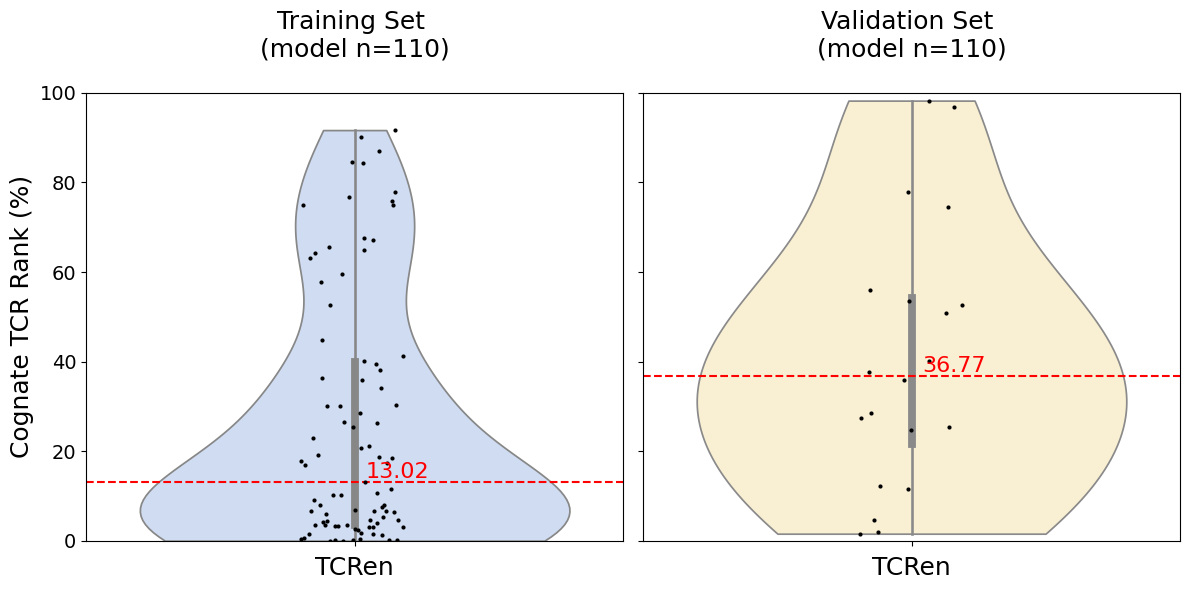

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the training and test data
df_training = pd.read_csv('./output/training_set/cognate_TCR_rank.csv')
df_test = pd.read_csv('./output/test_set/Sequence information/mycode/mhcI (n=110)/cognate_TCR_rank.csv')
df_training= df_training[df_training['tcr_id_reference'].isin(nr_human_108)]

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Calculate medians for both datasets
median_test = df_test['percentage_lower'].median()
median_training = df_training['percentage_lower'].median()

# Plot for the Training Set (now on axes[0])
sns.violinplot(data=df_training, y='percentage_lower', inner='box', color="#c9daf8ff", cut=0, ax=axes[0])
sns.stripplot(data=df_training, y='percentage_lower', color="black", size=3, jitter=True, ax=axes[0])

# Add a horizontal line and text to show the median for the training set
axes[0].axhline(median_training, color='red', linestyle='--', label=f'Median: {median_training:.2f}')
axes[0].text(0.02, median_training + 1, f'{median_training:.2f}', color='red', ha='left', fontsize=16)
axes[0].set_title("Training Set \n (model n=110) \n", fontsize=18)
axes[0].set_xlabel("TCRen", fontsize=18)
axes[0].tick_params(axis='y', labelsize=14)
axes[0].set_ylabel("Cognate TCR Rank (%)", fontsize=18)

# Plot for the Test Set (now on axes[1])
sns.violinplot(data=df_test, y='percentage_lower', inner='box', color="#fff2cc90", cut=0, ax=axes[1])
sns.stripplot(data=df_test, y='percentage_lower', color="black", size=3, jitter=True, ax=axes[1])

# Add a horizontal line and text to show the median for the test set
axes[1].axhline(median_test, color='red', linestyle='--', label=f'Median: {median_test:.2f}')
axes[1].text(0.02, median_test + 1, f'{median_test:.2f}', color='red', ha='left', fontsize=16)
axes[1].set_title("Validation Set \n (model n=110) \n", fontsize=18)
axes[1].set_xlabel("TCRen", fontsize=18)
axes[1].set_ylabel("")

# Set the Y-axis range for both plots
axes[0].set_ylim(0, 100)
axes[1].set_ylim(0, 100)

# Adjust layout for a cleaner display
plt.tight_layout()
plt.show()

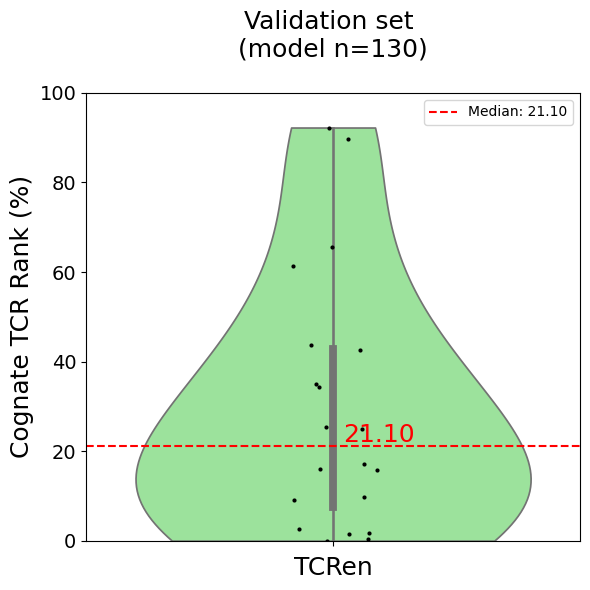

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data for test and training
df_test = pd.read_csv('./output/test_set/mycode/n=130/cognate_TCR_rank.csv')

# Calculate the medians
median_test = df_test['percentage_lower'].median()
median_training = df_training['percentage_lower'].median()  # This median is calculated but not used here

# Set up the figure and axes
fig, axes = plt.subplots(1, 1, figsize=(6, 6))  # Adjust size as needed

# Create the violin plot
sns.violinplot(data=df_test, y='percentage_lower', inner='box', color="lightgreen", cut=0, ax=axes)
sns.stripplot(data=df_test, y='percentage_lower', color="black", size=3, jitter=True, ax=axes)

# Add a horizontal line for the median
axes.axhline(median_test, color='red', linestyle='--', label=f'Median: {median_test:.2f}')
axes.text(0.02, median_test + 1, f'{median_test:.2f}', color='red', ha='left', fontsize = 18)

# Set titles and labels
axes.set_title("Validation set \n (model n=130) \n", fontsize = 18)
axes.set_xlabel("TCRen", fontsize =18)  # You may want to adjust the label if it's actually a y-axis label
axes.set_ylabel("Cognate TCR Rank (%)", fontsize = 18)
axes.tick_params(axis='y', labelsize=14)

# Configure the Y-axis limits
axes.set_ylim(0, 100)

# Adjust the layout
plt.tight_layout()
plt.legend()
plt.show()

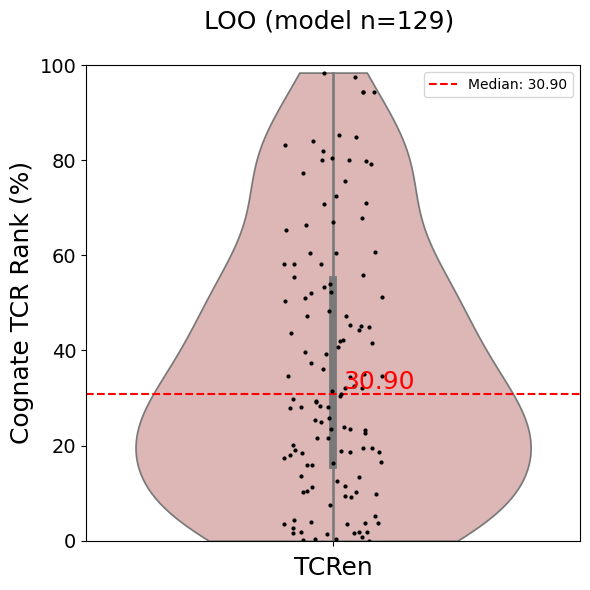

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data for test and training
df_test = pd.read_csv('./output/LOO/cognate_TCR_rank_LOO.csv')

# Calculate the medians
median_test = df_test['percentage_lower'].median()
median_training = df_training['percentage_lower'].median()  # This median is calculated but not used here

# Set up the figure and axes
fig, axes = plt.subplots(1, 1, figsize=(6, 6))  # Adjust size as needed

# Create the violin plot
sns.violinplot(data=df_test, y='percentage_lower', inner='box', color="#e3b0b0ff", cut=0, ax=axes)
sns.stripplot(data=df_test, y='percentage_lower', color="black", size=3, jitter=True, ax=axes)

# Add a horizontal line for the median
axes.axhline(median_test, color='red', linestyle='--', label=f'Median: {median_test:.2f}')
axes.text(0.02, median_test + 1, f'{median_test:.2f}', color='red', ha='left', fontsize = 18)

# Set titles and labels
axes.set_title("LOO (model n=129) \n", fontsize = 18)
axes.set_xlabel("TCRen", fontsize =18)  # You may want to adjust the label if it's actually a y-axis label
axes.set_ylabel("Cognate TCR Rank (%)", fontsize = 18)
axes.tick_params(axis='y', labelsize=14)

# Configure the Y-axis limits
axes.set_ylim(0, 100)

# Adjust the layout
plt.tight_layout()
plt.legend()
plt.show()

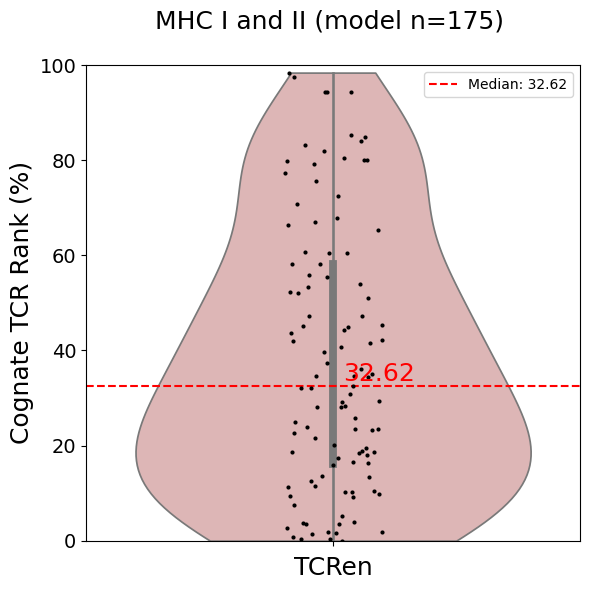

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data for test and training
df_test = pd.read_csv('./output/LOO/cognate_TCR_rank_LOO.csv')

# List of TCR IDs that you want to filter
nr_human_108=['7n2p', '7l1d', '4jry', '5wkf', '2ypl', '5isz', '6bj3', '5c08', '7n2o', '5jhd', '7pb2', '2ak4', '8wul', '8shi', '1mi5', '5eu6', '3d3v', '4jrx', '2esv', '3gsn', '7rrg', '3hg1', '6bj2', '5c09', '5men', '7n2n', '6r2l', '7ndq', '6rp9', '7ow6', '7q9b', '6uon', '5nmf', '5jzi', '6mtm', '7nme', '7pbe', '5e9d', '8gvi', '8enh', '4qrp', '7n1e', '6zkw', '5w1w', '5nqk', '7q99', '3sjv', '7n6e', '4g8g', '2vlj', '6rpb', '5d2l', '3ffc', '3dxa', '8i5c', '1bd2', '6vrm', '8i5d', '7r80', '8cx4', '6uln', '6vmx', '6rsy', '6tmo', '6vm8', '5d2n', '3kpr', '7rtr', '8f5a', '6avf', '4eup', '5xov', '6vqo', '6vm9', '7dzn', '5brz', '3o4l', '6rpa', '7phr', '8qfy', '6avg', '3qdj', '4qrr', '6vrn', '3qdm', '8dnt', '6amu', '2jcc', '5e6i', '3pwp', '7byd', '4mji', '3vxs', '7n2s', '3mv9', '2nx5', '6p64', '7qpj', '7rm4', '5tez', '6tro', '5euo', '7n2r', '8gon', '3vxu', '6q3s', '3vxm', '7rk7']

# Filter the data to only include rows where 'tcr_id' is in the nr_human_108 list
df_filtered = df_test[df_test['tcr_id_reference'].isin(nr_human_108)]

# Calculate the median of the filtered DataFrame
median_test_filtered = df_filtered['percentage_lower'].median()

# Set up the figure and axes
fig, axes = plt.subplots(1, 1, figsize=(6, 6))  # Adjust size as needed

# Create the violin plot using the filtered data
sns.violinplot(data=df_filtered, y='percentage_lower', inner='box', color="#e3b0b0ff", cut=0, ax=axes)
sns.stripplot(data=df_filtered, y='percentage_lower', color="black", size=3, jitter=True, ax=axes)

# Add a horizontal line for the median
axes.axhline(median_test_filtered, color='red', linestyle='--', label=f'Median: {median_test_filtered:.2f}')
axes.text(0.02, median_test_filtered + 1, f'{median_test_filtered:.2f}', color='red', ha='left', fontsize=18)

# Set titles and labels
axes.set_title("MHC I and II (model n=175) \n", fontsize=18)
axes.set_xlabel("TCRen", fontsize=18)  # Adjust the label if it's meant for the y-axis instead
axes.set_ylabel("Cognate TCR Rank (%)", fontsize=18)
axes.tick_params(axis='y', labelsize=14)

# Configure the Y-axis limits
axes.set_ylim(0, 100)

# Adjust layout and show the legend
plt.tight_layout()
plt.legend()

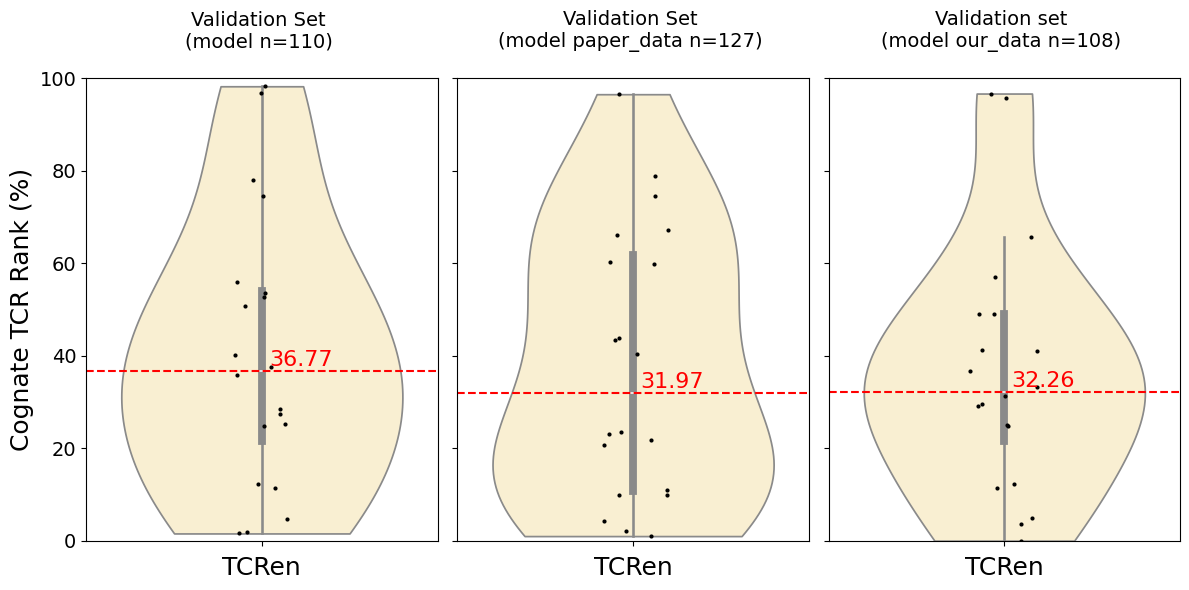

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the training and test data
df_1= pd.read_csv('./output/test_set/Sequence information/mycode/mhcI (n=110)/cognate_TCR_rank.csv')
df_2= pd.read_csv('./output/test_set/Sequence information/theircode/mhcI+II (n=123)/cognate_TCR_rank.csv')
df_3= pd.read_csv('./output/test_set/Sequence information/theircode/mhcI (n=108)/cognate_TCR_rank.csv') 

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 3, figsize=(12, 6), sharey=True)

# Calculate medians for both datasets
median_1 = df_1['percentage_lower'].median()
median_2 = df_2['percentage_lower'].median()
median_3 = df_3['percentage_lower'].median()

# Plot for the Training Set (now on axes[0])
sns.violinplot(data=df_1, y='percentage_lower', inner='box', color="#fff2cc90", cut=0, ax=axes[0])
sns.stripplot(data=df_1, y='percentage_lower', color="black", size=3, jitter=True, ax=axes[0])

# Add a horizontal line and text to show the median for the training set
axes[0].axhline(median_1, color='red', linestyle='--', label=f'Median: {median_1:.2f}')
axes[0].text(0.02, median_1 + 1, f'{median_1:.2f}', color='red', ha='left', fontsize=16)
axes[0].set_title("Validation Set \n(model n=110) \n", fontsize=14)
axes[0].set_xlabel("TCRen", fontsize=18)
axes[0].tick_params(axis='y', labelsize=14)
axes[0].set_ylabel("Cognate TCR Rank (%)", fontsize=18)

# Plot for the Test Set (now on axes[1])
sns.violinplot(data=df_2, y='percentage_lower', inner='box', color="#fff2cc90", cut=0, ax=axes[1])
sns.stripplot(data=df_2, y='percentage_lower', color="black", size=3, jitter=True, ax=axes[1])

# Add a horizontal line and text to show the median for the test set
axes[1].axhline(median_2, color='red', linestyle='--', label=f'Median: {median_2:.2f}')
axes[1].text(0.02, median_2 + 1, f'{median_2:.2f}', color='red', ha='left', fontsize=16)
axes[1].set_title("Validation Set \n(model paper_data n=127) \n", fontsize=14)
axes[1].set_xlabel("TCRen", fontsize=18)
axes[1].set_ylabel("")

# Plot for the Test Set (now on axes[1])
sns.violinplot(data=df_3, y='percentage_lower', inner='box', color="#fff2cc90", cut=0, ax=axes[2])
sns.stripplot(data=df_3, y='percentage_lower', color="black", size=3, jitter=True, ax=axes[2])

# Add a horizontal line and text to show the median for the test set
axes[2].axhline(median_3, color='red', linestyle='--', label=f'Median: {median_3:.2f}')
axes[2].text(0.02, median_3 + 1, f'{median_3:.2f}', color='red', ha='left', fontsize=16)
axes[2].set_title("Validation set \n(model our_data n=108) \n", fontsize=14)
axes[2].set_xlabel("TCRen", fontsize=18)
axes[2].set_ylabel("")


# Set the Y-axis range for both plots
axes[0].set_ylim(0, 100)
axes[1].set_ylim(0, 100)
axes[2].set_ylim(0, 100)

# Adjust layout for a cleaner display
plt.tight_layout()
plt.show()

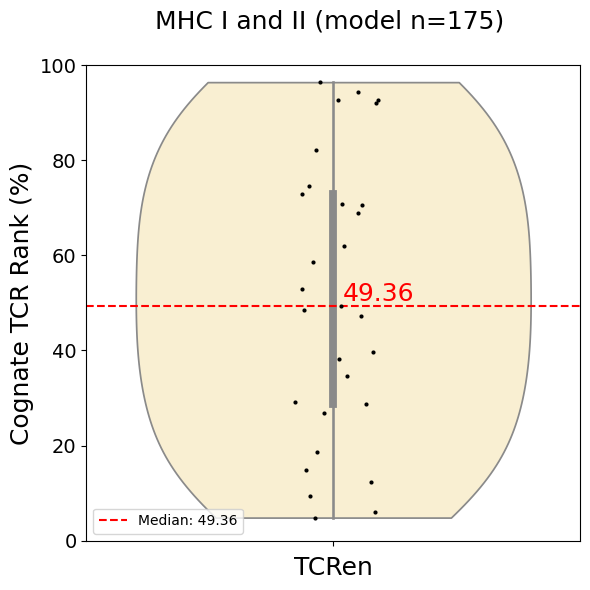

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data for test and training
df_test = pd.read_csv('./output/TCRranker/groups/group_5/cognate_tcr_rank.csv')

# Calculate the medians
median_test = df_test['percentage_lower'].median()

# Set up the figure and axes
fig, axes = plt.subplots(1, 1, figsize=(6, 6))  # Adjust size as needed

# Create the violin plot
sns.violinplot(data=df_test, y='percentage_lower', inner='box', color="#fff2cc90", cut=0, ax=axes)
sns.stripplot(data=df_test, y='percentage_lower', color="black", size=3, jitter=True, ax=axes)

# Add a horizontal line for the median
axes.axhline(median_test, color='red', linestyle='--', label=f'Median: {median_test:.2f}')
axes.text(0.02, median_test + 1, f'{median_test:.2f}', color='red', ha='left', fontsize = 18)

# Set titles and labels
axes.set_title("MHC I and II (model n=175) \n", fontsize = 18)
axes.set_xlabel("TCRen", fontsize =18)  # You may want to adjust the label if it's actually a y-axis label
axes.set_ylabel("Cognate TCR Rank (%)", fontsize = 18)
axes.tick_params(axis='y', labelsize=14)

# Configure the Y-axis limits
axes.set_ylim(0, 100)

# Adjust the layout
plt.tight_layout()
plt.legend()
plt.show()

/var/folders/ks/wvvv20910hn2944q3hp0_v080000gn/T/ipykernel_2966/1207646082.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_combined, x='Set', y='percentage_lower', inner='box', palette=palette, cut=0, ax=ax)


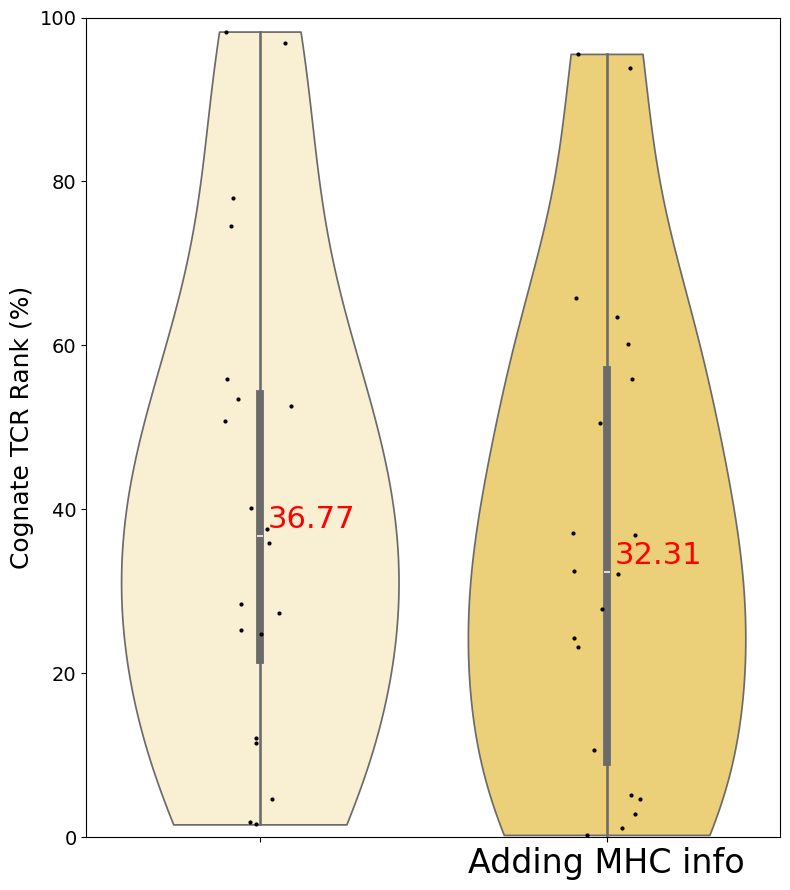

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data for test and training
df_train = pd.read_csv('./output/test_set/Sequence information/mycode/mhcI (n=110)/cognate_tcr_rank_mhc.csv')
df_test = pd.read_csv('./output/test_set/Sequence information/mycode/mhcI (n=110)/cognate_TCR_rank.csv')  # Path to test data

# Add a column to differentiate test vs. train
df_test['Set'] = ''
df_train['Set'] = 'Adding MHC info'

# Combine data for both sets
df_combined = pd.concat([df_test, df_train])

# Calculate the medians
median_test = df_test['percentage_lower'].median()
median_train = df_train['percentage_lower'].median()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 9))  # Adjust size as needed

# Define color palette
palette = {"": "#fff2cc90", "Adding MHC info": "#ffd966"}

# Create the violin plots for both test and train data
sns.violinplot(data=df_combined, x='Set', y='percentage_lower', inner='box', palette=palette, cut=0, ax=ax)
sns.stripplot(data=df_combined, x='Set', y='percentage_lower', color="black", size=3, jitter=True, ax=ax)

# Annotate median values as text (no lines)
ax.text(+0.15, median_test + 1, f'{median_test:.2f}', color='red', ha='center', fontsize=22)
ax.text(1.15, median_train + 1, f'{median_train:.2f}', color='red', ha='center', fontsize=22)

# Set titles and labels
ax.set_ylabel("Cognate TCR Rank (%)", fontsize=18)
ax.set_xlabel("", fontsize=18)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=24)

# Configure the Y-axis limits
ax.set_ylim(0, 100)

# Adjust the layout
plt.tight_layout()
plt.show()

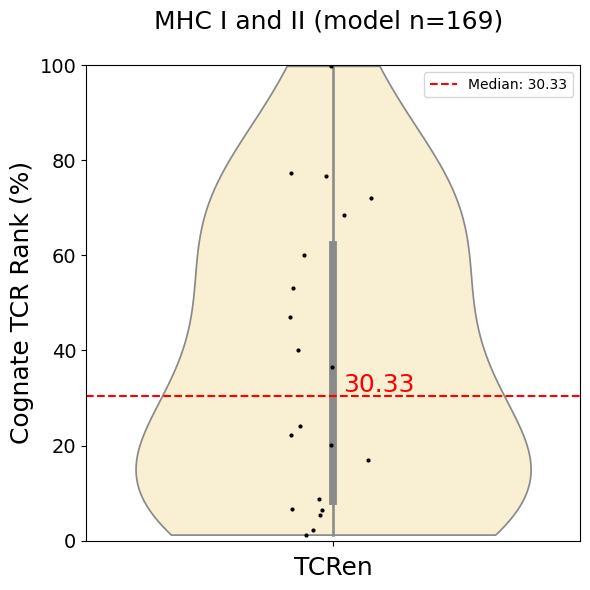

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data for test and training
df_test = pd.read_csv('./output/test_set/cognate_TCR_rank.csv')

# Calculate the medians
median_test = df_test['percentage_lower'].median()

# Set up the figure and axes
fig, axes = plt.subplots(1, 1, figsize=(6, 6))  # Adjust size as needed

# Create the violin plot
sns.violinplot(data=df_test, y='percentage_lower', inner='box', color="#fff2cc90", cut=0, ax=axes)
sns.stripplot(data=df_test, y='percentage_lower', color="black", size=3, jitter=True, ax=axes)

# Add a horizontal line for the median
axes.axhline(median_test, color='red', linestyle='--', label=f'Median: {median_test:.2f}')
axes.text(0.02, median_test + 1, f'{median_test:.2f}', color='red', ha='left', fontsize = 18)

# Set titles and labels
axes.set_title("MHC I and II (model n=169) \n", fontsize = 18)
axes.set_xlabel("TCRen", fontsize =18)  # You may want to adjust the label if it's actually a y-axis label
axes.set_ylabel("Cognate TCR Rank (%)", fontsize = 18)
axes.tick_params(axis='y', labelsize=14)

# Configure the Y-axis limits
axes.set_ylim(0, 100)

# Adjust the layout
plt.tight_layout()
plt.legend()
plt.show()

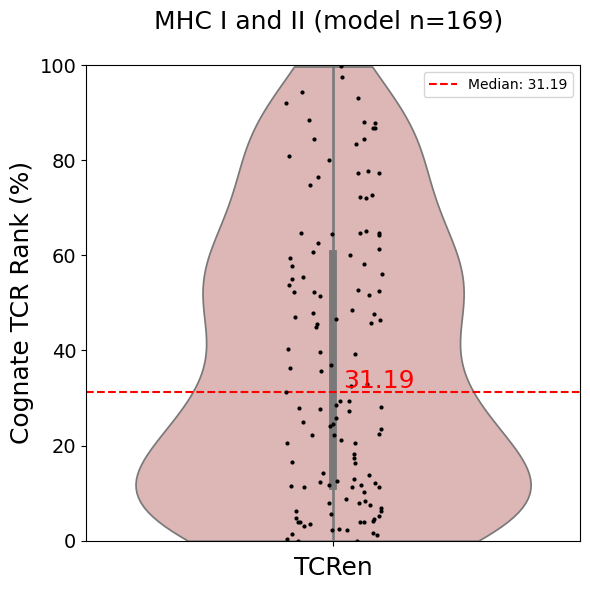

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data for test and training
df_test = pd.read_csv('../TCRranker2/output/LOO/cognate_TCR_rank.csv')

# Calculate the medians
median_test = df_test['percentage_lower'].median()

# Set up the figure and axes
fig, axes = plt.subplots(1, 1, figsize=(6, 6))  # Adjust size as needed

# Create the violin plot
sns.violinplot(data=df_test, y='percentage_lower', inner='box', color="#e3b0b0ff", cut=0, ax=axes)
sns.stripplot(data=df_test, y='percentage_lower', color="black", size=3, jitter=True, ax=axes)

# Add a horizontal line for the median
axes.axhline(median_test, color='red', linestyle='--', label=f'Median: {median_test:.2f}')
axes.text(0.02, median_test + 1, f'{median_test:.2f}', color='red', ha='left', fontsize = 18)

# Set titles and labels
axes.set_title("MHC I and II (model n=169) \n", fontsize = 18)
axes.set_xlabel("TCRen", fontsize =18)  # You may want to adjust the label if it's actually a y-axis label
axes.set_ylabel("Cognate TCR Rank (%)", fontsize = 18)
axes.tick_params(axis='y', labelsize=14)

# Configure the Y-axis limits
axes.set_ylim(0, 100)

# Adjust the layout
plt.tight_layout()
plt.legend()
plt.show()

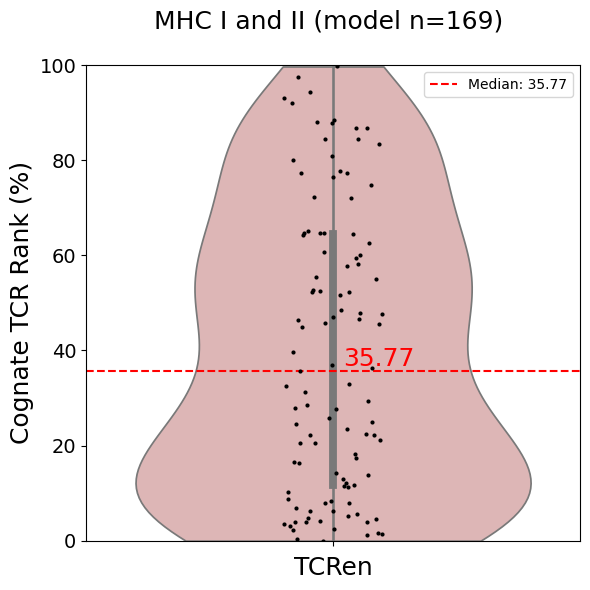

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data for test and training
df_test = pd.read_csv('../TCRranker2/output/LOO/cognate_TCR_rank.csv')

# List of TCR IDs that you want to filter
nr_human_108=['7n2p', '7l1d', '4jry', '5wkf', '2ypl', '5isz', '6bj3', '5c08', '7n2o', '5jhd', '7pb2', '2ak4', '8wul', '8shi', '1mi5', '5eu6', '3d3v', '4jrx', '2esv', '3gsn', '7rrg', '3hg1', '6bj2', '5c09', '5men', '7n2n', '6r2l', '7ndq', '6rp9', '7ow6', '7q9b', '6uon', '5nmf', '5jzi', '6mtm', '7nme', '7pbe', '5e9d', '8gvi', '8enh', '4qrp', '7n1e', '6zkw', '5w1w', '5nqk', '7q99', '3sjv', '7n6e', '4g8g', '2vlj', '6rpb', '5d2l', '3ffc', '3dxa', '8i5c', '1bd2', '6vrm', '8i5d', '7r80', '8cx4', '6uln', '6vmx', '6rsy', '6tmo', '6vm8', '5d2n', '3kpr', '7rtr', '8f5a', '6avf', '4eup', '5xov', '6vqo', '6vm9', '7dzn', '5brz', '3o4l', '6rpa', '7phr', '8qfy', '6avg', '3qdj', '4qrr', '6vrn', '3qdm', '8dnt', '6amu', '2jcc', '5e6i', '3pwp', '7byd', '4mji', '3vxs', '7n2s', '3mv9', '2nx5', '6p64', '7qpj', '7rm4', '5tez', '6tro', '5euo', '7n2r', '8gon', '3vxu', '6q3s', '3vxm', '7rk7']

# Filter the data to only include rows where 'tcr_id' is in the nr_human_108 list
df_filtered = df_test[df_test['tcr_id_reference'].isin(nr_human_108)]

# Calculate the median of the filtered DataFrame
median_test_filtered = df_filtered['percentage_lower'].median()

# Set up the figure and axes
fig, axes = plt.subplots(1, 1, figsize=(6, 6))  # Adjust size as needed

# Create the violin plot using the filtered data
sns.violinplot(data=df_filtered, y='percentage_lower', inner='box', color="#e3b0b0ff", cut=0, ax=axes)
sns.stripplot(data=df_filtered, y='percentage_lower', color="black", size=3, jitter=True, ax=axes)

# Add a horizontal line for the median
axes.axhline(median_test_filtered, color='red', linestyle='--', label=f'Median: {median_test_filtered:.2f}')
axes.text(0.02, median_test_filtered + 1, f'{median_test_filtered:.2f}', color='red', ha='left', fontsize=18)

# Set titles and labels
axes.set_title("MHC I and II (model n=169) \n", fontsize=18)
axes.set_xlabel("TCRen", fontsize=18)  # Adjust the label if it's meant for the y-axis instead
axes.set_ylabel("Cognate TCR Rank (%)", fontsize=18)
axes.tick_params(axis='y', labelsize=14)

# Configure the Y-axis limits
axes.set_ylim(0, 100)

# Adjust layout and show the legend
plt.tight_layout()
plt.legend()
plt.show()


/var/folders/ks/wvvv20910hn2944q3hp0_v080000gn/T/ipykernel_51627/1036049941.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_test, x='distance_range', y='percentage_lower', inner='box', palette=colors, cut=0, ax=axes, order=order)


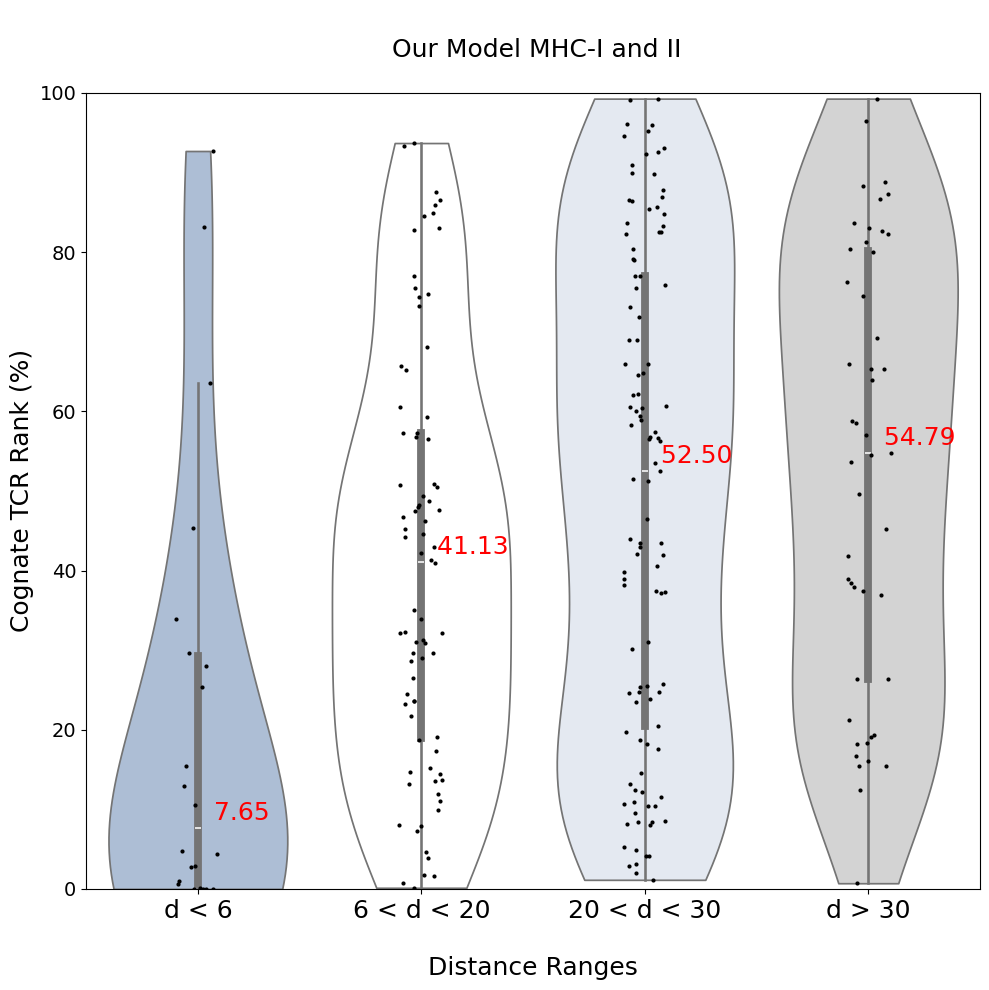

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the distance ranges and corresponding file paths
distance_ranges = ['d < 6', '6 < d < 20', '20 < d < 30', 'd > 30']
file_paths = [
    './output/training_set_similar/d<6 (n=130)/cognate_TCR_rank.csv',
    './output/training_set_similar/6<d<20 (n=130)/cognate_TCR_rank.csv',
    './output/training_set_similar/20<d<30 (n=130)/cognate_TCR_rank.csv',
    './output/training_set_similar/d>30 (n=130)/cognate_TCR_rank.csv'
]

# Initialize a list to store dataframes
df_list = []

# Load each dataset and add a distance_range column
for distance, path in zip(distance_ranges, file_paths):
    df_temp = pd.read_csv(path)
    df_temp['distance_range'] = distance
    df_list.append(df_temp)

# Concatenate all dataframes into one
df_test = pd.concat(df_list, ignore_index=True)

# Define the desired order of categories
order = ['d < 6', '6 < d < 20', '20 < d < 30', 'd > 30']

# Calculate the median for each group
median_test = df_test.groupby('distance_range')['percentage_lower'].median().reset_index()

# Ensure the medians are in the correct order
median_test['distance_range'] = pd.Categorical(median_test['distance_range'], categories=order, ordered=True)
median_test = median_test.sort_values('distance_range')

# Define the color palette for each distance range
colors = ["#a6bddc", "white", "#e2e8f3", "lightgray"]

# Set up the figure for the plot
fig, axes = plt.subplots(1, 1, figsize=(10, 10))

# Create the violin plot with the specified colors
sns.violinplot(data=df_test, x='distance_range', y='percentage_lower', inner='box', palette=colors, cut=0, ax=axes, order=order)
sns.stripplot(data=df_test, x='distance_range', y='percentage_lower', color="black", size=3, jitter=True, ax=axes, order=order)

# Add median markers and labels to the correct positions on the plot
for index, row in median_test.iterrows():
    pos = order.index(row['distance_range'])  # Find the position in the order array
    axes.text(pos, row['percentage_lower'] + 1, f'  {row["percentage_lower"]:.2f}', color='red', ha='left', fontsize=18)

# Set titles and labels for the plot
axes.set_title("\n Our Model MHC-I and II\n", fontsize=18)
axes.set_xlabel("\nDistance Ranges", fontsize=18)
axes.set_ylabel("Cognate TCR Rank (%)", fontsize=18)
axes.tick_params(axis='y', labelsize=14)
axes.tick_params(axis='x', labelsize=18)

# Set the limits for the Y-axis
axes.set_ylim(0, 100)

# Adjust the layout of the plot
plt.tight_layout()
plt.show()

In [35]:
# Mapping MHC 
pdb_file_path_mhc="./pdb_files/3sjv.pdb"
chains_mhc=chain_dict["3sjv"]
mhc_df=pd.read_csv("./input/input_MHCs.csv")
contacts_df = pd.read_csv(f"./contact_maps/3sjv_contacts.csv")
_ , contacts_TCR_MHC = filter_contacts(
                            contacts_df,
                            chains_mhc['tcra_chain'],
                            chains_mhc['tcrb_chain'],
                            chains_mhc['peptide_chain'],
                            chains_mhc['mhc_chain'],
                            threshold=1)
mhc_seq = mhc_df[mhc_df['mhc_allele'] == reference_allele]['mhc_seq'].values[0]
seq_pdb = extract_sequences(pdb_file_path_mhc)
aligned_seq_pdb, aligned_seq_query, score = global_alignment(seq_pdb[chains_mhc['mhc_chain']], mhc_seq)
residues_M = extract_residues_and_resids(pdb_file_path_mhc, chains_mhc['mhc_chain']) 
mapped_residues = map_alignment_to_residues(aligned_seq_pdb, aligned_seq_query, residues_M)
print(mapped_residues)    
df_tuples = pd.DataFrame(mapped_residues, columns=['resid', 'mhc_pdb', reference_allele])
print(df_tuples.head(n=200))
print(contacts_TCR_MHC)
contacts_TCR_MHC_updated = pd.merge(
                    contacts_TCR_MHC, 
                    df_tuples[['resid', reference_allele]], 
                    left_on='resid_to', 
                    right_on='resid', 
                    how='left')
contacts_TCR_MHC_updated = contacts_TCR_MHC_updated.drop(columns=['resid'])
 

print("Residues mapped")
print("Contact map TCR-MHC:\n",contacts_TCR_MHC.head())


[('-', '-', 'M'), ('-', '-', 'A'), ('-', '-', 'V'), ('-', '-', 'M'), ('-', '-', 'A'), ('-', '-', 'P'), ('-', '-', 'R'), ('-', '-', 'T'), ('-', '-', 'L'), ('-', '-', 'L'), ('-', '-', 'L'), ('-', '-', 'L'), ('-', '-', 'L'), ('-', '-', 'S'), ('-', '-', 'G'), ('-', '-', 'A'), ('-', '-', 'L'), ('-', '-', 'A'), ('-', '-', 'L'), ('-', '-', 'T'), ('-', '-', 'Q'), ('-', '-', 'T'), ('-', '-', 'W'), ('-', '-', 'A'), (1, 'G', 'G'), (2, 'S', 'S'), (3, 'H', 'H'), (4, 'S', 'S'), (5, 'M', 'M'), (6, 'R', 'R'), (7, 'Y', 'Y'), (8, 'F', 'F'), (9, 'D', 'F'), (10, 'T', 'T'), (11, 'A', 'S'), (12, 'M', 'V'), (13, 'S', 'S'), (14, 'R', 'R'), (15, 'P', 'P'), (16, 'G', 'G'), (17, 'R', 'R'), (18, 'G', 'G'), (19, 'E', 'E'), (20, 'P', 'P'), (21, 'R', 'R'), (22, 'F', 'F'), (23, 'I', 'I'), (24, 'S', 'A'), (25, 'V', 'V'), (26, 'G', 'G'), (27, 'Y', 'Y'), (28, 'V', 'V'), (29, 'D', 'D'), (30, 'D', 'D'), (31, 'T', 'T'), (32, 'Q', 'Q'), (33, 'F', 'F'), (34, 'V', 'V'), (35, 'R', 'R'), (36, 'F', 'F'), (37, 'D', 'D'), (38, 'S'

/var/folders/ks/wvvv20910hn2944q3hp0_v080000gn/T/ipykernel_2966/1322138430.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_test, x='distance_range', y='cognate_epitope_rank', inner='box', cut=0, ax=axes, order=order, palette=colors)


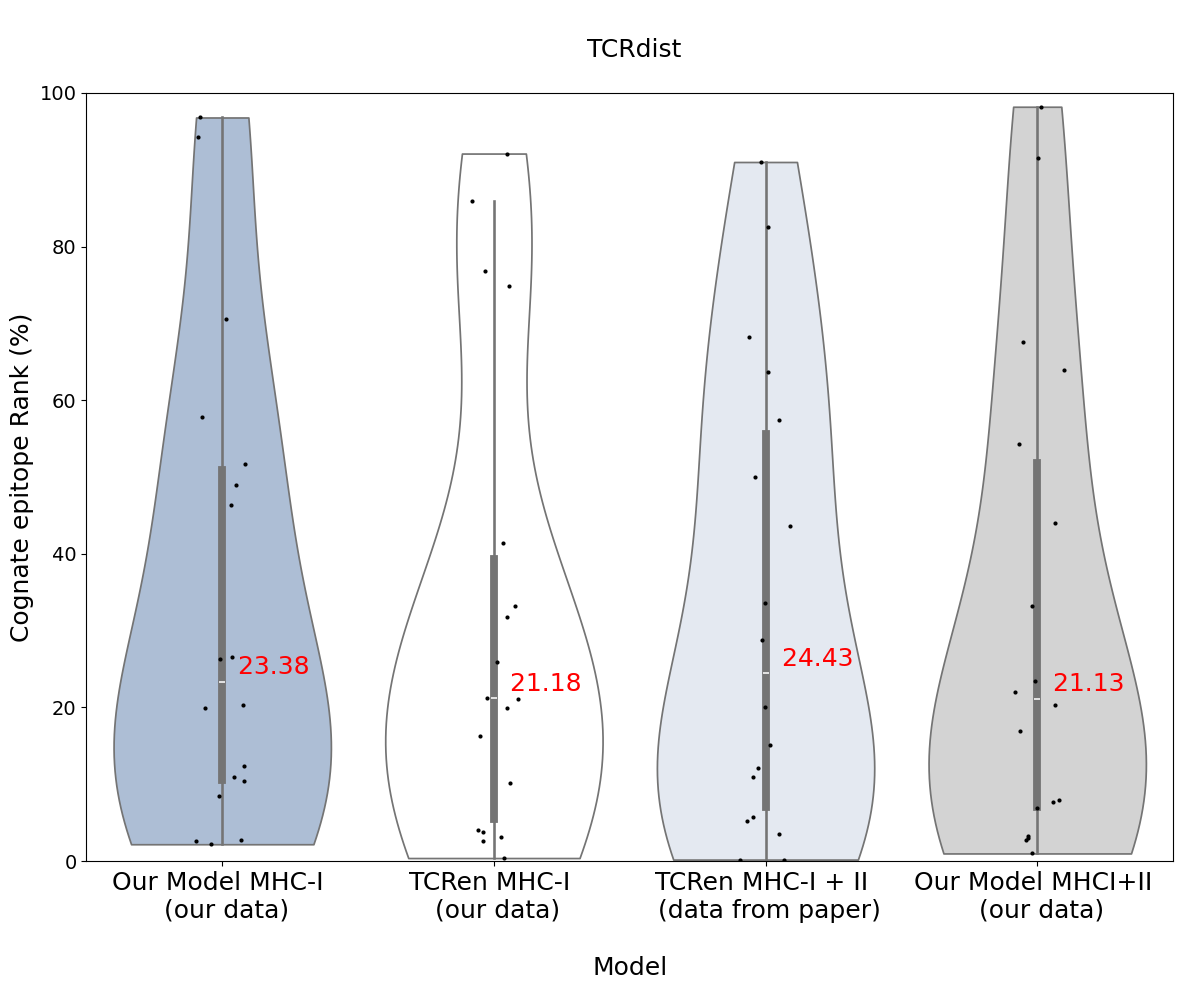

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the distance ranges and corresponding file paths
distance_ranges = [
    'Our Model MHC-I \n (our data)', 
    'TCRen MHC-I \n (our data)', 
    'TCRen MHC-I + II \n (data from paper)',  
    'Our Model MHCI+II \n (our data)'
]
file_paths = [
    './rank_epitopes/output/mycode/mymodel/TCRdist/cognate_epitope_rank.csv',
    './rank_epitopes/output/mycode/theirmodel_mydata/TCRdist/cognate_epitope_rank.csv',
    './rank_epitopes/output/mycode/theirmodel_paperdata/TCRdist/cognate_epitope_rank.csv',
    './rank_epitopes/output/mycode/mymodel_classII/TCRdist/cognate_epitope_rank.csv'
]

file_paths = [
    './rank_epitopes/output/theircode/mymodel/cognate_epitope_rank.csv',
    './rank_epitopes/output/theircode/theirmodel_mydata/cognate_epitope_rank.csv',
    './rank_epitopes/output/theircode/theirmodel_paperdata/cognate_epitope_rank.csv',
    './rank_epitopes/output/theircode/mymodel_classII/cognate_epitope_rank.csv'
]

# Initialize a list to store dataframes
df_list = []

# Load each dataset and add a distance_range column
for distance, path in zip(distance_ranges, file_paths):
    df_temp = pd.read_csv(path)
    df_temp['distance_range'] = distance
    df_list.append(df_temp)

# Concatenate all dataframes into one
df_test = pd.concat(df_list, ignore_index=True)

# Define the desired order of categories
order = [
    'Our Model MHC-I \n (our data)', 
    'TCRen MHC-I \n (our data)', 
    'TCRen MHC-I + II \n (data from paper)',  
    'Our Model MHCI+II \n (our data)'
]

# Calculate the median for each group
median_test = df_test.groupby('distance_range')['cognate_epitope_rank'].median().reset_index()

# Ensure the medians are in the correct order
median_test['distance_range'] = pd.Categorical(median_test['distance_range'], categories=order, ordered=True)
median_test = median_test.sort_values('distance_range')

# Define the color palette for each distance range
colors = ["#a6bddc", "white", "#e2e8f3", "lightgray"]

# Set up the figure for the plot
fig, axes = plt.subplots(1, 1, figsize=(12, 10))

# Create the violin plot with the specified colors
sns.violinplot(data=df_test, x='distance_range', y='cognate_epitope_rank', inner='box', cut=0, ax=axes, order=order, palette=colors)
sns.stripplot(data=df_test, x='distance_range', y='cognate_epitope_rank', color="black", size=3, jitter=True, ax=axes, order=order)

# Add median markers and labels to the correct positions on the plot
for index, row in median_test.iterrows():
    pos = order.index(row['distance_range'])  # Find the position in the order array
    axes.text(pos, row['cognate_epitope_rank'] + 1, f'  {row["cognate_epitope_rank"]:.2f}', color='red', ha='left', fontsize=18)

# Set titles and labels for the plot
axes.set_title("\n TCRdist\n", fontsize=18)
axes.set_xlabel("\nModel", fontsize=18)
axes.set_ylabel("Cognate epitope Rank (%)", fontsize=18)
axes.tick_params(axis='y', labelsize=14)
axes.tick_params(axis='x', labelsize=18)

# Set the limits for the Y-axis
axes.set_ylim(0, 100)

# Adjust the layout of the plot
plt.tight_layout()
plt.show()

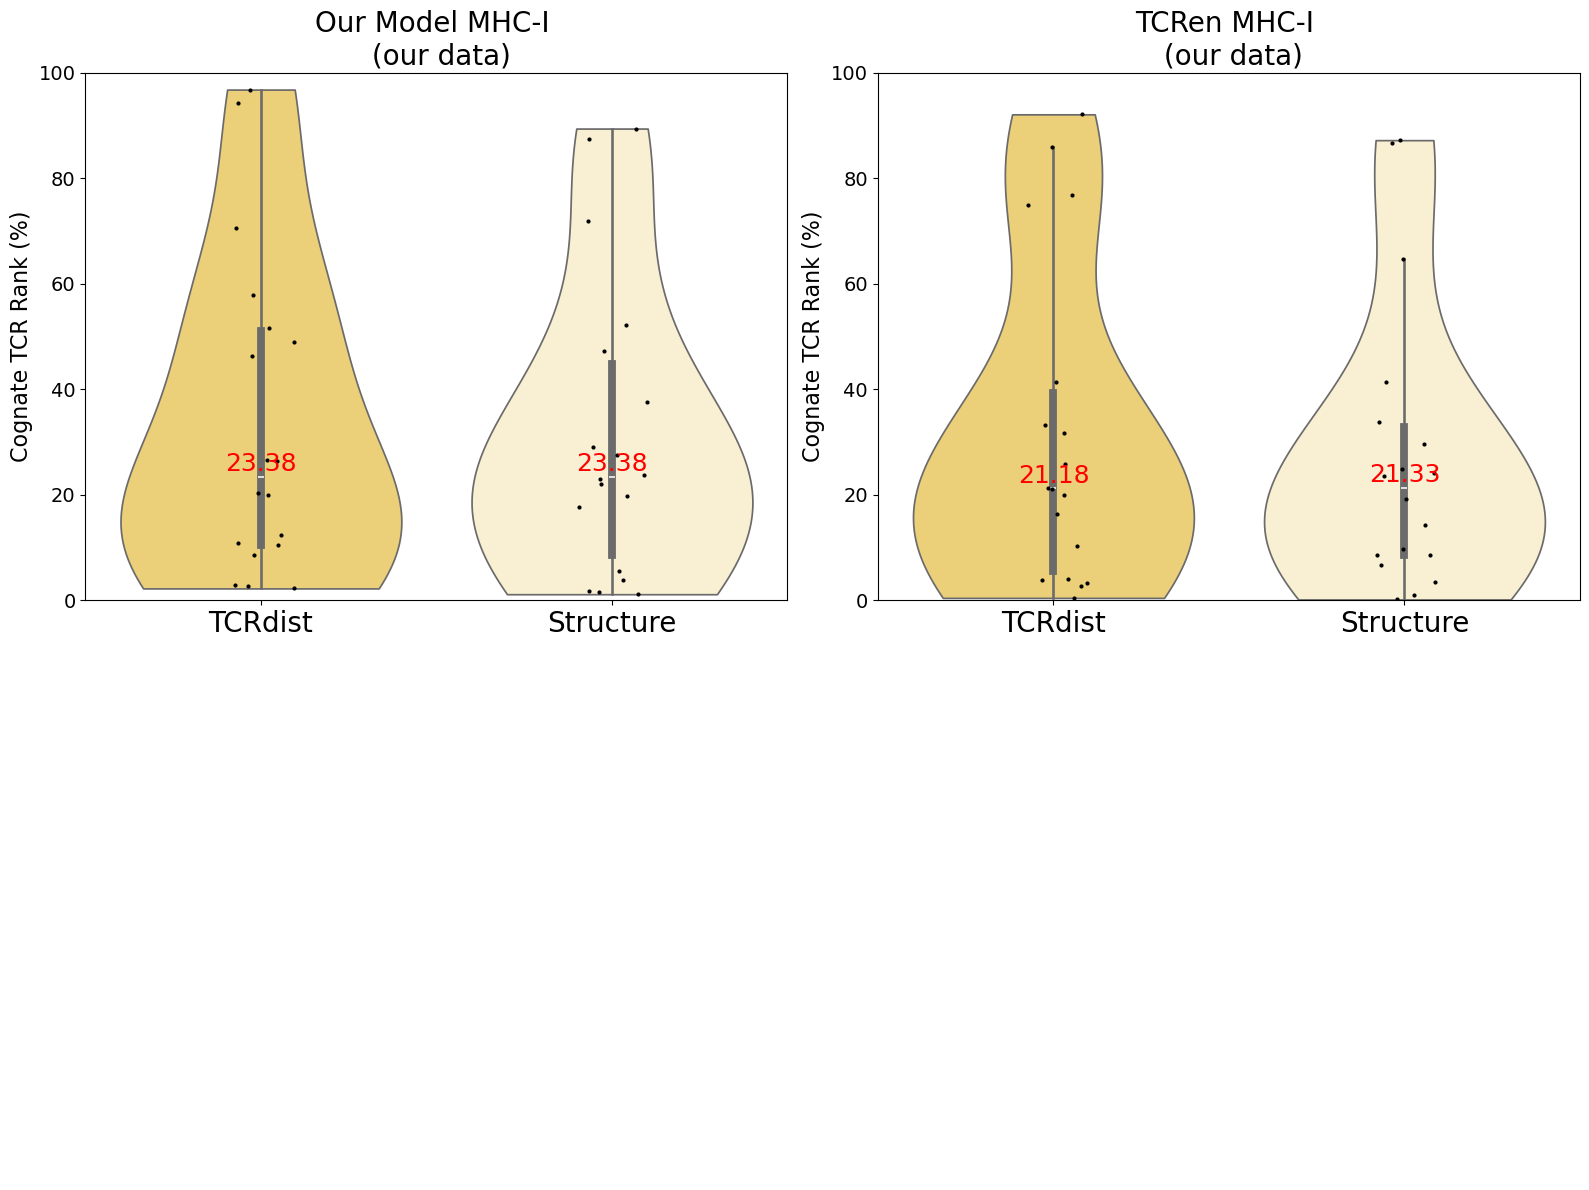

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data for TCRdist (train and test)
df_test_tcr = pd.read_csv('./rank_epitopes/output/mycode/mymodel/TCRdist/cognate_epitope_rank.csv')
df_train_tcr = pd.read_csv('./rank_epitopes/output/theircode/mymodel/cognate_epitope_rank.csv')

# Load the data for Structure (train and test)
df_test_structure = pd.read_csv('./rank_epitopes/output/mycode/theirmodel_mydata/TCRdist/cognate_epitope_rank.csv')
df_train_structure = pd.read_csv('./rank_epitopes/output/theircode/theirmodel_mydata/cognate_epitope_rank.csv')

# Add a column to differentiate test vs. train for TCRdist
df_test_tcr['Set'] = 'TCRdist'
df_train_tcr['Set'] = 'Structure'

# Combine data for TCRdist
df_combined_tcr = pd.concat([df_test_tcr, df_train_tcr])

# Calculate the medians for TCRdist
median_test_tcr = df_test_tcr['cognate_epitope_rank'].median()
median_train_tcr = df_train_tcr['cognate_epitope_rank'].median()

# Add a column to differentiate test vs. train for Structure
df_test_structure['Set'] = 'TCRdist'
df_train_structure['Set'] = 'Structure'

# Combine data for Structure
df_combined_structure = pd.concat([df_test_structure, df_train_structure])

# Calculate the medians for Structure
median_test_structure = df_test_structure['cognate_epitope_rank'].median()
median_train_structure = df_train_structure['cognate_epitope_rank'].median()

# Set up the figure and axes for 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Define color palette
palette = {"TCRdist": "#ffd966", "Structure": "#fff2cc90"}

# Create the violin plot for TCRdist
sns.violinplot(data=df_combined_tcr, x='Set', y='cognate_epitope_rank', inner='box', hue='Set', palette=palette, cut=0, ax=axes[0, 0], legend=False)
sns.stripplot(data=df_combined_tcr, x='Set', y='cognate_epitope_rank', color="black", size=3, jitter=True, ax=axes[0, 0])

# Annotate median values for TCRdist
axes[0, 0].text(0, median_test_tcr + 1, f'{median_test_tcr:.2f}', color='red', ha='center', fontsize=18)
axes[0, 0].text(1, median_train_tcr + 1, f'{median_train_tcr:.2f}', color='red', ha='center', fontsize=18)

# Set titles and labels for TCRdist
axes[0, 0].set_title("Our Model MHC-I \n (our data)", fontsize=20)
axes[0, 0].set_ylabel("Cognate TCR Rank (%)", fontsize=16)
axes[0, 0].set_xlabel("", fontsize=16)
axes[0, 0].tick_params(axis='y', labelsize=14)
axes[0, 0].tick_params(axis='x', labelsize=20)
axes[0, 0].set_ylim(0, 100)

# Create the violin plot for Structure
sns.violinplot(data=df_combined_structure, x='Set', y='cognate_epitope_rank', inner='box', hue='Set', palette=palette, cut=0, ax=axes[0, 1], legend=False)
sns.stripplot(data=df_combined_structure, x='Set', y='cognate_epitope_rank', color="black", size=3, jitter=True, ax=axes[0, 1])

# Annotate median values for Structure
axes[0, 1].text(0, median_test_structure + 1, f'{median_test_structure:.2f}', color='red', ha='center', fontsize=18)
axes[0, 1].text(1, median_train_structure + 1, f'{median_train_structure:.2f}', color='red', ha='center', fontsize=18)

# Set titles and labels for Structure
axes[0, 1].set_title("TCRen MHC-I \n (our data)", fontsize=20)
axes[0, 1].set_ylabel("Cognate TCR Rank (%)", fontsize=16)
axes[0, 1].set_xlabel("", fontsize=16)
axes[0, 1].tick_params(axis='y', labelsize=14)
axes[0, 1].tick_params(axis='x', labelsize=20)
axes[0, 1].set_ylim(0, 100)

# Set titles for second row (empty plots)
axes[1, 0].axis('off')  # Disable the unused subplot
axes[1, 1].axis('off')  # Disable the unused subplot

# Adjust the layout
plt.tight_layout()
plt.show()

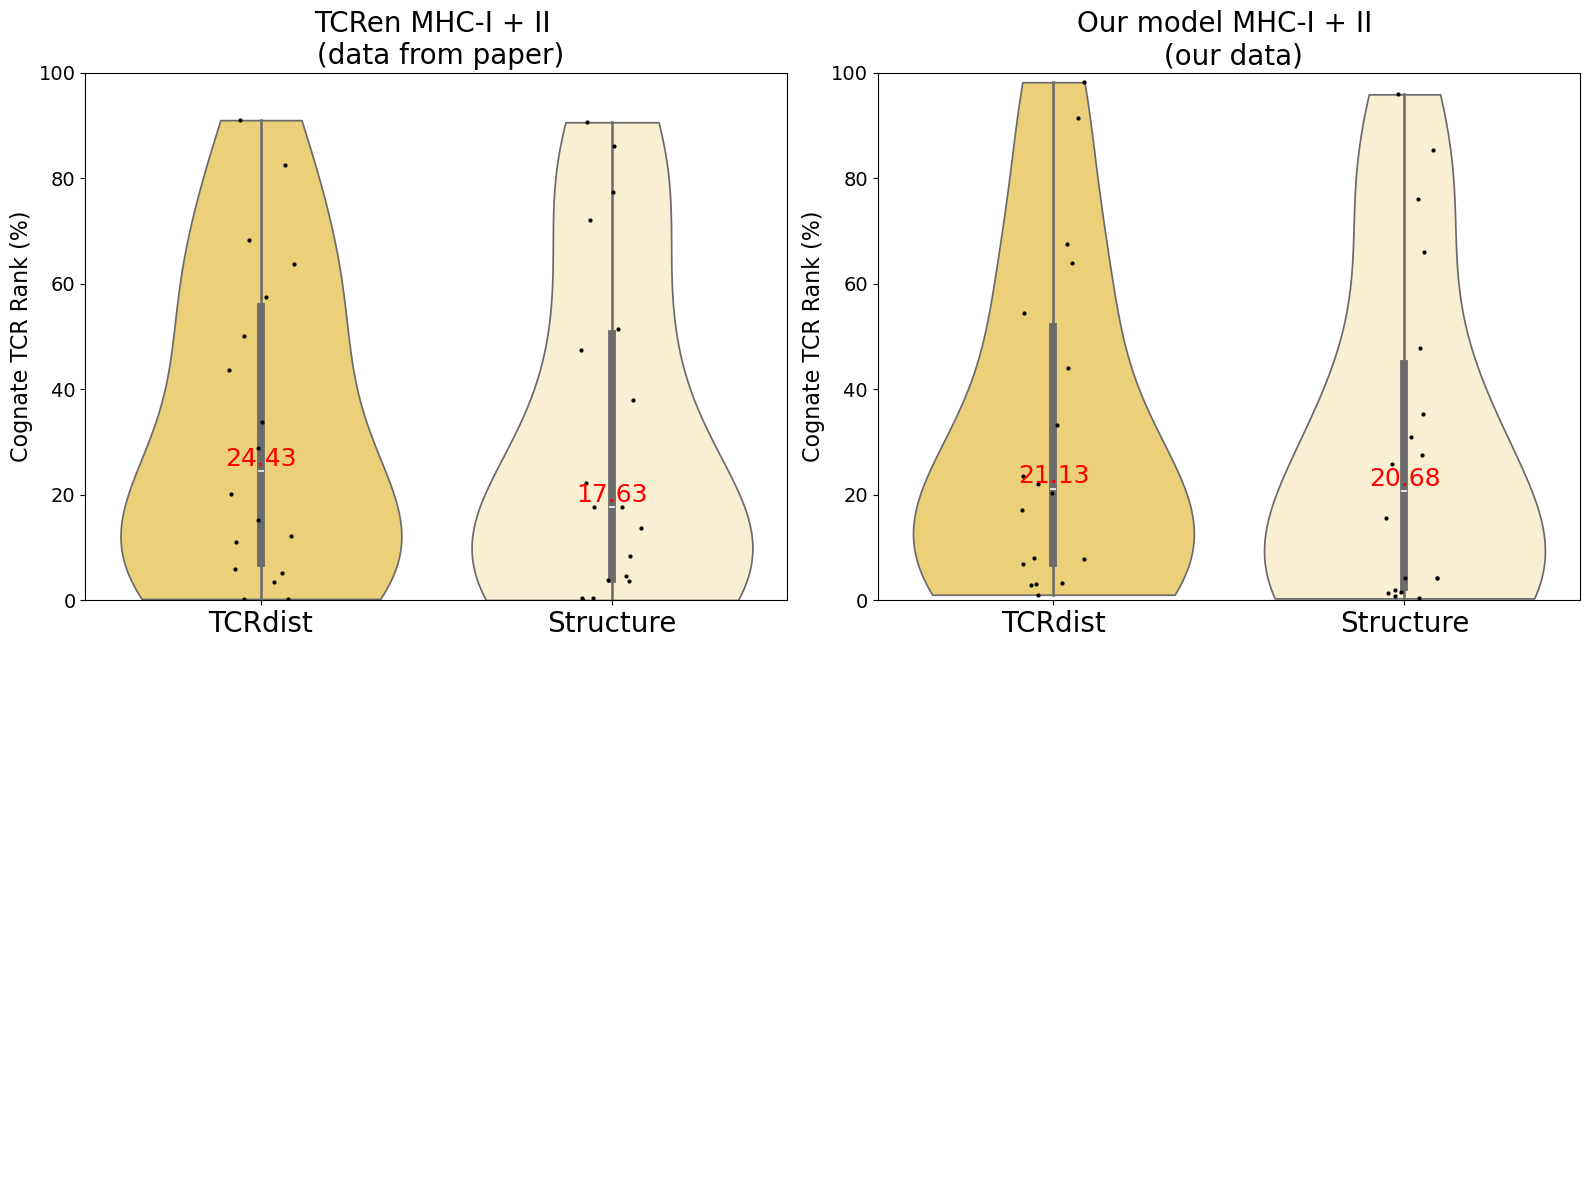

In [122]:
# Load the second set of data for TCRdist (train and test)
df_test_tcr = pd.read_csv('./rank_epitopes/output/mycode/theirmodel_paperdata/TCRdist/cognate_epitope_rank.csv')
df_train_tcr = pd.read_csv('./rank_epitopes/output/theircode/theirmodel_paperdata/cognate_epitope_rank.csv')

# Load the second set of data for Structure (train and test)
df_test_structure = pd.read_csv('./rank_epitopes/output/mycode/mymodel_classII/TCRdist/cognate_epitope_rank.csv')
df_train_structure = pd.read_csv('./rank_epitopes/output/theircode/mymodel_classII/cognate_epitope_rank.csv')


# Add a column to differentiate test vs. train for TCRdist
df_test_tcr['Set'] = 'TCRdist'
df_train_tcr['Set'] = 'Structure'

# Combine data for TCRdist
df_combined_tcr = pd.concat([df_test_tcr, df_train_tcr])

# Calculate the medians for TCRdist
median_test_tcr = df_test_tcr['cognate_epitope_rank'].median()
median_train_tcr = df_train_tcr['cognate_epitope_rank'].median()

# Add a column to differentiate test vs. train for Structure
df_test_structure['Set'] = 'TCRdist'
df_train_structure['Set'] = 'Structure'

# Combine data for Structure
df_combined_structure = pd.concat([df_test_structure, df_train_structure])

# Calculate the medians for Structure
median_test_structure = df_test_structure['cognate_epitope_rank'].median()
median_train_structure = df_train_structure['cognate_epitope_rank'].median()

# Set up the figure and axes for 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Define color palette
palette = {"TCRdist": "#ffd966", "Structure": "#fff2cc90"}

# Create the violin plot for TCRdist
sns.violinplot(data=df_combined_tcr, x='Set', y='cognate_epitope_rank', inner='box', hue='Set', palette=palette, cut=0, ax=axes[0, 0], legend=False)
sns.stripplot(data=df_combined_tcr, x='Set', y='cognate_epitope_rank', color="black", size=3, jitter=True, ax=axes[0, 0])

# Annotate median values for TCRdist
axes[0, 0].text(0, median_test_tcr + 1, f'{median_test_tcr:.2f}', color='red', ha='center', fontsize=18)
axes[0, 0].text(1, median_train_tcr + 1, f'{median_train_tcr:.2f}', color='red', ha='center', fontsize=18)

# Set titles and labels for TCRdist
axes[0, 0].set_title("TCRen MHC-I + II \n (data from paper)", fontsize=20)
axes[0, 0].set_ylabel("Cognate TCR Rank (%)", fontsize=16)
axes[0, 0].set_xlabel("", fontsize=16)
axes[0, 0].tick_params(axis='y', labelsize=14)
axes[0, 0].tick_params(axis='x', labelsize=20)
axes[0, 0].set_ylim(0, 100)

# Create the violin plot for Structure
sns.violinplot(data=df_combined_structure, x='Set', y='cognate_epitope_rank', inner='box', hue='Set', palette=palette, cut=0, ax=axes[0, 1], legend=False)
sns.stripplot(data=df_combined_structure, x='Set', y='cognate_epitope_rank', color="black", size=3, jitter=True, ax=axes[0, 1])

# Annotate median values for Structure
axes[0, 1].text(0, median_test_structure + 1, f'{median_test_structure:.2f}', color='red', ha='center', fontsize=18)
axes[0, 1].text(1, median_train_structure + 1, f'{median_train_structure:.2f}', color='red', ha='center', fontsize=18)

# Set titles and labels for Structure
axes[0, 1].set_title("Our model MHC-I + II \n (our data)", fontsize=20)
axes[0, 1].set_ylabel("Cognate TCR Rank (%)", fontsize=16)
axes[0, 1].set_xlabel("", fontsize=16)
axes[0, 1].tick_params(axis='y', labelsize=14)
axes[0, 1].tick_params(axis='x', labelsize=20)
axes[0, 1].set_ylim(0, 100)

# Set titles for second row (empty plots)
axes[1, 0].axis('off')  # Disable the unused subplot
axes[1, 1].axis('off')  # Disable the unused subplot

# Adjust the layout
plt.tight_layout()
plt.show()